# import library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df_jf = pd.read_csv('/content/jfleg_validation.csv')
df_jf.head()

,input,target
0,So I think we can not live if old people could...,So I think we would not be alive if our ancest...
1,For not use car .,Not for use with a car .
2,Here was no promise of morning except that we ...,"Here was no promise of morning , except that w..."
3,Thus even today sex is considered as the least...,"Thus , even today , sex is considered as the l..."
4,image you salf you are wark in factory just to...,Imagine yourself you are working in factory ju...


In [ ]:
# Load dataset
df2 = pd.read_csv('Grammar Correction.csv')
df2.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


# Drop fitur serial number

In [ ]:
df2 = df2.drop('Serial Number', axis=1)

In [ ]:
df2

,Error Type,Ungrammatical Statement,Standard English
0,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.
...,...,...,...
2013,Lack of Parallelism in Lists or Series,"The festival celebrates music, culture, and to...","The festival celebrates music, culture, and br..."
2014,Lack of Parallelism in Lists or Series,The seminar will address topics such as career...,The seminar will address topics such as career...
2015,Lack of Parallelism in Lists or Series,The research examines the effects of climate c...,The research examines the effects of climate c...
2016,Lack of Parallelism in Lists or Series,"The report highlights the need for investment,...","The report highlights the need for investment,..."


# Menampilkan nilai unik dari fitur error type

Nilai unik fitur error_type:
['Verb Tense Errors' 'Subject-Verb Agreement' 'Article Usage'
 'Preposition Usage' 'Sentence Structure Errors' 'Spelling Mistakes'
 'Punctuation Errors' 'Capitalization Errors' 'Word Choice/Usage'
 'Run-on Sentences' 'Sentence Fragments' 'Redundancy/Repetition'
 'Mixed Metaphors/Idioms' 'Passive Voice Overuse' 'Pronoun Errors'
 'Conjunction Misuse' 'Modifiers Misplacement'
 'Agreement in Comparative and Superlative Forms' 'Parallelism Errors'
 'Quantifier Errors' 'Tautology' 'Inappropriate Register' 'Ambiguity'
 'Mixed Conditionals' 'Faulty Comparisons' 'Incorrect Auxiliaries'
 'Negation Errors' 'Ellipsis Errors' 'Slang, Jargon, and Colloquialisms'
 'Clichés' 'Abbreviation Errors' 'Contractions Errors'
 'Relative Clause Errors' 'Infinitive Errors'
 'Gerund and Participle Errors' 'Lack of Parallelism in Lists or Series']

Jumlah nilai unik: 36


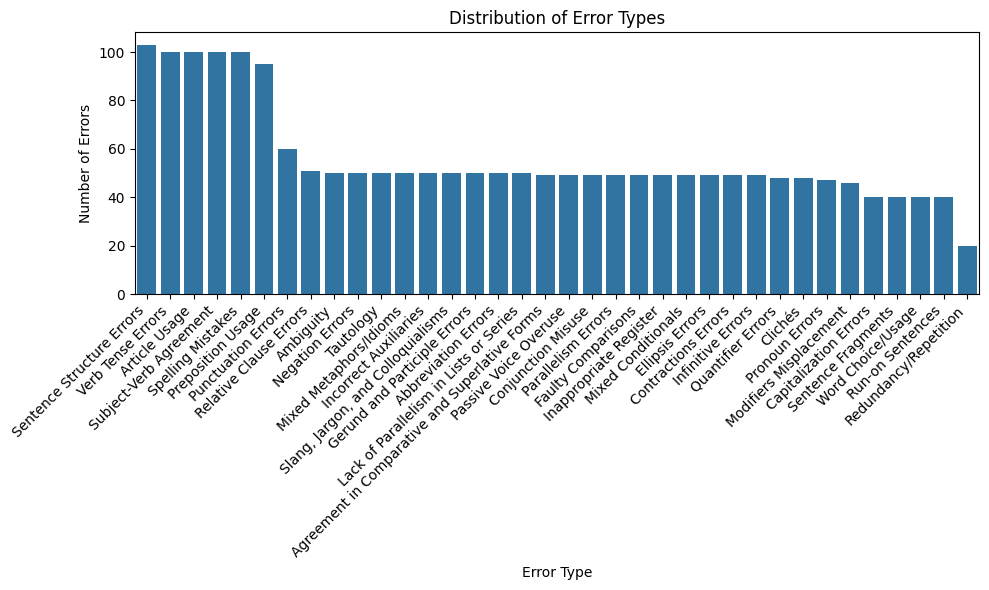

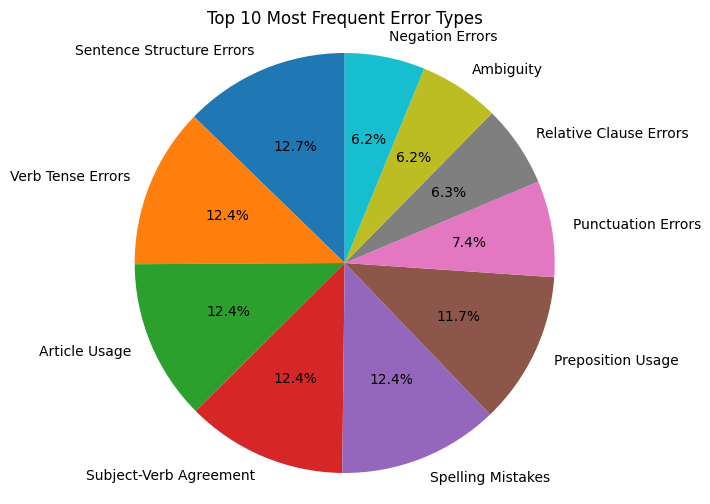

In [ ]:
# Tampilkan nilai unik dari kolom 'error_type' pada DataFrame df_new
unique_error_types = df2['Error Type'].unique()
print("Nilai unik fitur error_type:")
print(unique_error_types)

# Tampilkan jumlah nilai unik
print(f"\nJumlah nilai unik: {len(unique_error_types)}")

# Count the occurrences of each error type
error_counts = df2['Error Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values)
plt.xlabel("Error Type")
plt.ylabel("Number of Errors")
plt.title("Distribution of Error Types")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Visualize the top 10 most frequent errors
top_10_errors = error_counts.head(10)
plt.figure(figsize=(8, 6))
plt.pie(top_10_errors, labels=top_10_errors.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Most Frequent Error Types")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Seleksi jenis error type yang relevan untuk speech to text

In [ ]:
selected_errors = [

    'Verb Tense Errors',
    'Subject-Verb Agreement',
    'Preposition Usage',
    'Article Usage',
    'Pronoun Errors',
    'Word Choice/Usage',
    'Relative Clause Errors',
    'Incorrect Auxiliaries',
    'Gerund and Participle Errors',
    'Infinitive Errors',
    'Sentence Fragments',
    'Sentence Structure Errors',
    'Passive Voice Overuse',
    'Redundancy/Repetition',
    'Modifiers Misplacement'
]

df_filtered = df2[df2['Error Type'].isin(selected_errors)]


In [ ]:
df_filtered.to_csv("filtered_grammar_correction.csv", index=False)

print("✅ Filtered data saved to filtered_grammar_correction.csv")

✅ Filtered data saved to filtered_grammar_correction.csv


In [ ]:
df_filtered = pd.read_csv('filtered_grammar_correction.csv')
df_filtered

,Error Type,Ungrammatical Statement,Standard English
0,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.
...,...,...,...
935,Gerund and Participle Errors,I apologize for any inconvenience my mistake m...,I apologize for any inconvenience my mistake m...
936,Gerund and Participle Errors,The soccer player was injure during the game.,The soccer player was injured during the game.
937,Gerund and Participle Errors,The politician's speech was focused on promote...,The politician's speech was focused on promoti...
938,Gerund and Participle Errors,The architect's bold vision led to the creatio...,The architect's bold vision led to creating a ...


### ganti variabel untuk menyesuaikan kode training nantinya

In [ ]:
df_gc = df2.rename(columns={
    'Ungrammatical Statement': 'input',
    'Standard English': 'target',
    'Error Type': 'error_type'
})

## label encoder error type

In [ ]:
le = LabelEncoder()
df_gc['error_type_encoded'] = le.fit_transform(df_gc['error_type'])

In [ ]:
df_gc

,error_type,input,target,error_type_encoded
0,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,34
1,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,34
2,Verb Tense Errors,She have completed her homework.,She has completed her homework.,34
3,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,34
4,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,34
...,...,...,...,...
2013,Lack of Parallelism in Lists or Series,"The festival celebrates music, culture, and to...","The festival celebrates music, culture, and br...",14
2014,Lack of Parallelism in Lists or Series,The seminar will address topics such as career...,The seminar will address topics such as career...,14
2015,Lack of Parallelism in Lists or Series,The research examines the effects of climate c...,The research examines the effects of climate c...,14
2016,Lack of Parallelism in Lists or Series,"The report highlights the need for investment,...","The report highlights the need for investment,...",14


# TF-IDF untuk mencari kata terpenting setiap error typenya

In [ ]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf.fit_transform(df_gc['input'])
y = df_gc['error_type_encoded']

# Random Over sampling untuk menangani keseimbangan kelas

In [ ]:
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_tfidf, y)

# Analisis interseksi kata untuk estimasi berapa yang bisa terprediksi pseudo labeling

In [ ]:

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## mancari tahu kata yang hanya ada di Grammar Correction.csv dan JFLEG.csv dan interseksi untuk mengestimasi pseudo labeling

Words unique to Grammar Correction.csv (2265):
['painted', '76.', 'designs', 'plans', 'qtr', 'sharpest', '53.', 'bagels', 'supermarket', '94.', 'engage', 'closer', 'styles', 'accurate', 'unpopular', 'loss', 'weakest', 'da', 'west', 'blew', 'peas', 'guilty', 'uniquely', 'dr.', 'ddos', 'recycling', 'high-performance', 'attends', 'ice', 'turn', '86.', 'airport', 'inconclusive', 'tires', 'road', 'submits', 'solutions', 'engineers', 'discovered', "'bout", 'trainin', 'mouse', 'backyard', 'must-visit', 'relaxing', 'sun', 'clothing', 'signature', 'beside', 'blooming']

Words unique to jfleg_validation.csv (1439):
['thoes', 'routes', 'problemes', 'mang', 'mean', 'incorporated', 'happening', 'reply', 'towns', 'persian', 'commercial', 'poultry', 'win', 'myself', 'anasazi', 'practical', 'immediate', 'entities', 'keeping', 'subects', 'acqurie', 'everything', 'hamburger', 'contrasting', 'chances', 'memories', 'insufficient', 'u', 'enogh', 'knowlegde', 'feel', 'exertion', 'hte', 'destroy', 'broadcast

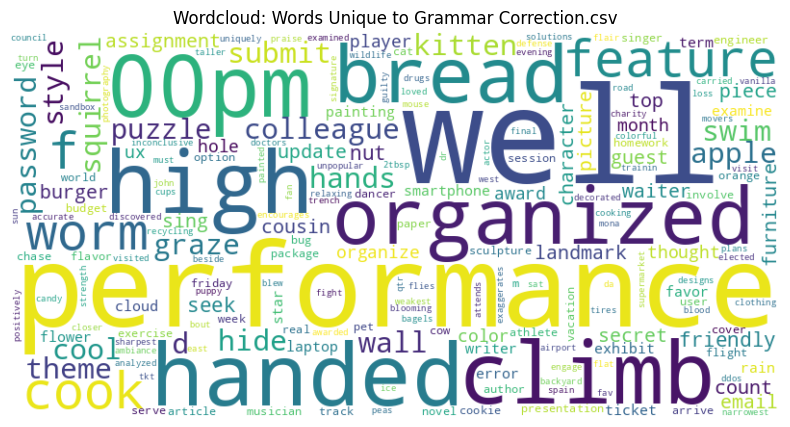

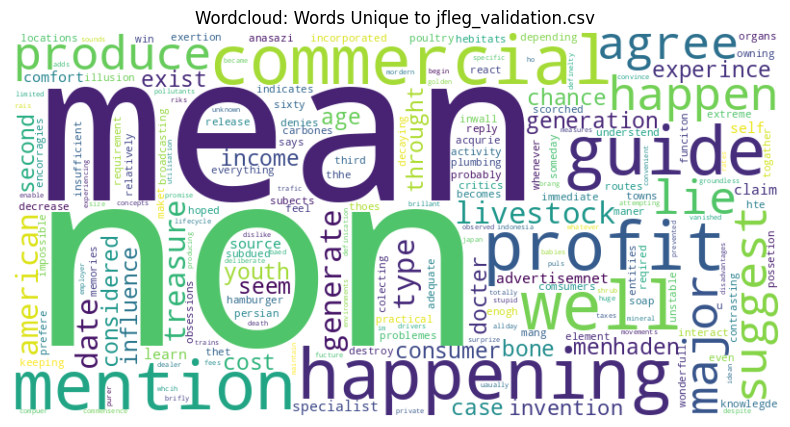

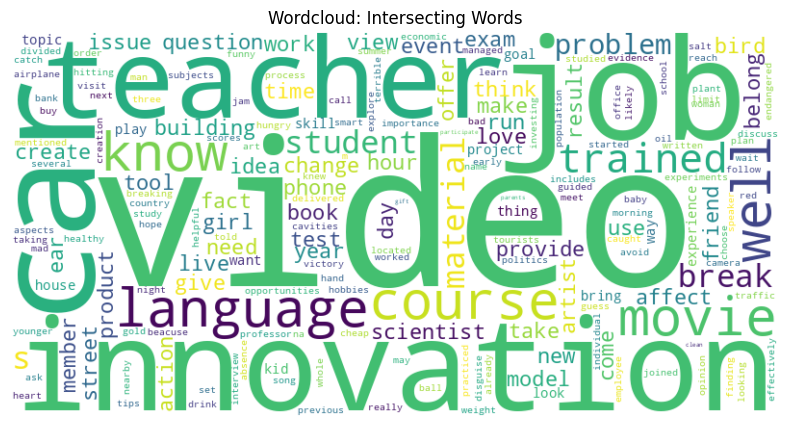

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

# Function to get words from a DataFrame column
def get_words(df, column_name):
    text = ' '.join(df[column_name].dropna().astype(str))
    words = word_tokenize(text.lower())
    return set(words)

# Get words from both dataframes (using the 'input' column for df_gc and 'Ungrammatical Statement' for df2)
words_gc = get_words(df_jf, 'input')
words_df2 = get_words(df2, 'Ungrammatical Statement')

# Words unique to Grammar Correction.csv
unique_to_df2 = words_df2 - words_gc
print(f"Words unique to Grammar Correction.csv ({len(unique_to_df2)}):")
print(list(unique_to_df2)[:50]) # Print first 50 unique words

# Words unique to jfleg_validation.csv
unique_to_gc = words_gc - words_df2
print(f"\nWords unique to jfleg_validation.csv ({len(unique_to_gc)}):")
print(list(unique_to_gc)[:50]) # Print first 50 unique words

# Intersecting words
intersecting_words = words_gc.intersection(words_df2)
print(f"\nIntersecting words ({len(intersecting_words)}):")
print(list(intersecting_words)[:50]) # Print first 50 intersecting words

# Total unique words in both datasets
total_unique_words = words_gc.union(words_df2)
total_words_count = len(total_unique_words)

# Percentage of words
percentage_unique_to_df2 = (len(unique_to_df2) / total_words_count) * 100 if total_words_count > 0 else 0
percentage_unique_to_gc = (len(unique_to_gc) / total_words_count) * 100 if total_words_count > 0 else 0
percentage_intersecting = (len(intersecting_words) / total_words_count) * 100 if total_words_count > 0 else 0

print(f"\nPercentage unique to Grammar Correction.csv: {percentage_unique_to_df2:.2f}%")
print(f"Percentage unique to jfleg_validation.csv: {percentage_unique_to_gc:.2f}%")
print(f"Percentage intersecting: {percentage_intersecting:.2f}%")

# Generate wordcloud for unique words in Grammar Correction.csv
if unique_to_df2:
    wordcloud_df2 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(list(unique_to_df2)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_df2, interpolation='bilinear')
    plt.axis('off')
    plt.title('Wordcloud: Words Unique to Grammar Correction.csv')
    plt.show()
else:
    print("\nNo unique words in Grammar Correction.csv for wordcloud.")


# Generate wordcloud for unique words in jfleg_validation.csv
if unique_to_gc:
    wordcloud_gc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(list(unique_to_gc)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_gc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Wordcloud: Words Unique to jfleg_validation.csv')
    plt.show()
else:
     print("\nNo unique words in jfleg_validation.csv for wordcloud.")

# Generate wordcloud for intersecting words
if intersecting_words:
    wordcloud_intersecting = WordCloud(width=800, height=400, background_color='white').generate(' '.join(list(intersecting_words)))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_intersecting, interpolation='bilinear')
    plt.axis('off')
    plt.title('Wordcloud: Intersecting Words')
    plt.show()
else:
    print("\nNo intersecting words for wordcloud.")


### Prediksi jfleg yang berhasil di pseudo labeling

In [ ]:
angka = input("Masukkan angka: ")
persen = 23.12/100
hasil = int(angka) * persen
print(hasil)

Masukkan angka: 754
174.3248


In [ ]:
df_jfleg = pd.read_csv('/content/jfleg_validation.csv')
df_jfleg.columns = ['input', 'target']
df_jfleg.dropna(subset=['input'], inplace=True)


# Pseudo labeling menggunakan XGBoost

In [ ]:

!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming X_balanced and y_balanced are available from the previous Logistic Regression steps

# Convert sparse matrix to dense for XGBoost if needed (XGBoost can handle sparse, but sometimes dense is easier)
# X_balanced_dense = X_balanced.todense()

# Split the balanced data for evaluation
# We are still evaluating on the balanced training data for direct comparison as in the previous step.
# In a real scenario, you'd split your original data or use a separate validation set.
# Here, we'll just train and evaluate on the full balanced dataset as done with LR.
X_train_xgb = X_balanced
y_train_xgb = y_balanced

# Initialize and train the XGBoost classifier
# Use 'multi:softprob' objective for multi-class classification with probability outputs
# Use 'softmax' or 'logloss' for evaluation metric
xgb_model = xgb.XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric='mlogloss', random_state=42)

print("Training XGBoost model...")
xgb_model.fit(X_train_xgb, y_train_xgb)
print("XGBoost model training complete.")

# Make predictions on the balanced training data
y_pred_balanced_xgb = xgb_model.predict(X_balanced)

# Decode the predictions back to original error types
y_true_balanced_labels_xgb = le.inverse_transform(y_balanced)
y_pred_balanced_labels_xgb = le.inverse_transform(y_pred_balanced_xgb)

# Evaluate the model's performance on the balanced data
print("\nClassification Report on Balanced Training Data (XGBoost):")
print(classification_report(y_true_balanced_labels_xgb, y_pred_balanced_labels_xgb))


# --- Adapt the pseudo labeling loop for XGBoost ---

# Re-initialize the shadow labeling process if you want to run it with XGBoost
# Assuming df_jfleg, tfidf, le, ros are already defined
# Make sure to re-import if needed

df_jfleg = pd.read_csv('/content/jfleg_validation.csv')
df_jfleg.columns = ['input', 'target']
df_jfleg.dropna(subset=['input'], inplace=True)

# Ubah threshold (you might need to tune this for XGBoost)
confidence_threshold = 0.8
iteration = 0
remaining_data = df_jfleg.copy()

# Kosongkan pseudo-label akumulasi
accumulated_pseudo_labels = pd.DataFrame(columns=['input', 'y'])

# Use the trained XGBoost model
current_model = xgb_model

while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} (XGBoost) ---")

    if remaining_data.empty:
        print("No remaining data to process.")
        break

    # Vectorize data input
    X_remaining_vec = tfidf.transform(remaining_data['input'])

    # Prediksi probabilitas & pseudo-label with XGBoost
    probas_remaining = current_model.predict_proba(X_remaining_vec)
    pseudo_labels_remaining_encoded = current_model.predict(X_remaining_vec)
    pseudo_confidence_remaining = probas_remaining.max(axis=1)

    # Thresholding
    mask_high_conf_iter = pseudo_confidence_remaining >= confidence_threshold
    X_pseudo_high_conf_iter = remaining_data.loc[mask_high_conf_iter, 'input']
    pseudo_labels_high_conf_iter_encoded = pseudo_labels_remaining_encoded[mask_high_conf_iter]
    pseudo_confidence_high_conf_iter = pseudo_confidence_remaining[mask_high_conf_iter]

    num_passed = len(X_pseudo_high_conf_iter)
    print(f"Number of pseudo-labels passing threshold {confidence_threshold}: {num_passed}")

    if num_passed == 0:
        print("No pseudo-labels passed the threshold in this iteration. Stopping.")
        break

    # Decode pseudo-labels
    pseudo_labels_high_conf_iter_decoded = le.inverse_transform(pseudo_labels_high_conf_iter_encoded)

    # Simpan pseudo-labeled data dari iterasi ini
    df_pseudo_labeled_iter = pd.DataFrame({
        'input': X_pseudo_high_conf_iter,
        'target': '',
        'error_type': pseudo_labels_high_conf_iter_decoded,
        'error_type_encoded': pseudo_labels_high_conf_iter_encoded,
        'confidence': pseudo_confidence_high_conf_iter
    })

    # Tambahkan pseudo-labeled ke data akumulasi
    current_pseudo_labels = df_pseudo_labeled_iter[['input', 'error_type_encoded']].copy()
    current_pseudo_labels = current_pseudo_labels.rename(columns={'error_type_encoded': 'y'})
    accumulated_pseudo_labels = pd.concat([accumulated_pseudo_labels, current_pseudo_labels], ignore_index=True)

    # Siapkan data latih kombinasi (data original + pseudo-labeled)
    original_training_subset = df_gc[['input', 'error_type_encoded']].copy()
    original_training_subset = original_training_subset.rename(columns={'error_type_encoded': 'y'})
    combined_training_data = pd.concat([original_training_subset, accumulated_pseudo_labels], ignore_index=True)

    # Vectorize
    X_combined_tfidf = tfidf.transform(combined_training_data['input'])
    y_combined = combined_training_data['y']

    # Ensure y_combined is of an integer type recognized by imblearn
    y_combined = y_combined.astype(int)

    # Balance data
    X_balanced_iter, y_balanced_iter = ros.fit_resample(X_combined_tfidf, y_combined)

    # Retrain model using XGBoost
    current_model = xgb.XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    current_model.fit(X_balanced_iter, y_balanced_iter)
    print("XGBoost Model retrained with combined data.")

    # Update data yang belum confident
    remaining_data = remaining_data[~mask_high_conf_iter].copy()
    print(f"Remaining data for next iteration: {len(remaining_data)}")

print("\n✅ Shadow labeling with threshold 0.80 done using XGBoost!")


Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:02:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model training complete.

Classification Report on Balanced Training Data (XGBoost):
                                                precision    recall  f1-score   support

                           Abbreviation Errors       0.92      0.59      0.72       103
Agreement in Comparative and Superlative Forms       0.82      0.73      0.77       103
                                     Ambiguity       0.86      0.72      0.78       103
                                 Article Usage       0.55      0.50      0.52       103
                         Capitalization Errors       0.86      0.61      0.72       103
                                       Clichés       0.16      0.87      0.28       103
                            Conjunction Misuse       0.85      0.77      0.81       103
                           Contractions Errors       0.82      0.61      0.70       103
                               Ellipsis Errors       0.91      0.77      0.83       103
                          

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 671

--- Iteration 2 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 47


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 624

--- Iteration 3 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 16


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 608

--- Iteration 4 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 11


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 597

--- Iteration 5 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 11


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 586

--- Iteration 6 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 11


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 575

--- Iteration 7 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 2


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 573

--- Iteration 8 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 1


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 572

--- Iteration 9 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 10


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:04:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 562

--- Iteration 10 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 7


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 555

--- Iteration 11 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 4


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 551

--- Iteration 12 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 1


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model retrained with combined data.
Remaining data for next iteration: 550

--- Iteration 13 (XGBoost) ---
Number of pseudo-labels passing threshold 0.8: 0
No pseudo-labels passed the threshold in this iteration. Stopping.

✅ Shadow labeling with threshold 0.80 done using XGBoost!


# Pseudo labeling menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_balanced and y_balanced are available from the previous Logistic Regression steps

# Split the balanced data for evaluation (using the same split logic as before for comparison)
X_train_rf = X_balanced
y_train_rf = y_balanced

# Initialize and train the RandomForest classifier
# You can adjust hyperparameters like n_estimators, criterion, max_depth, etc.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("Training RandomForest model...")
rf_model.fit(X_train_rf, y_train_rf)
print("RandomForest model training complete.")

# Make predictions on the balanced training data
y_pred_balanced_rf = rf_model.predict(X_balanced)

# Decode the predictions back to original error types
y_true_balanced_labels_rf = le.inverse_transform(y_balanced)
y_pred_balanced_labels_rf = le.inverse_transform(y_pred_balanced_rf)

# Evaluate the model's performance on the balanced data
print("\nClassification Report on Balanced Training Data (RandomForest):")
print(classification_report(y_true_balanced_labels_rf, y_pred_balanced_labels_rf))


# --- Adapt the pseudo labeling loop for RandomForest ---

# Re-initialize the shadow labeling process if you want to run it with RandomForest
# Assuming df_jfleg, tfidf, le, ros are already defined
# Make sure to re-import if needed

df_jfleg = pd.read_csv('/content/jfleg_validation.csv')
df_jfleg.columns = ['input', 'target']
df_jfleg.dropna(subset=['input'], inplace=True)

# Ubah threshold (you might need to tune this for RandomForest)
confidence_threshold = 0.8
iteration = 0
remaining_data = df_jfleg.copy()

# Kosongkan pseudo-label akumulasi
accumulated_pseudo_labels_rf = pd.DataFrame(columns=['input', 'y'])

# Use the trained RandomForest model
current_model_rf = rf_model

while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} (RandomForest) ---")

    if remaining_data.empty:
        print("No remaining data to process.")
        break

    # Vectorize data input
    X_remaining_vec = tfidf.transform(remaining_data['input'])

    # Prediksi probabilitas & pseudo-label with RandomForest
    probas_remaining = current_model_rf.predict_proba(X_remaining_vec)
    pseudo_labels_remaining_encoded = current_model_rf.predict(X_remaining_vec)
    pseudo_confidence_remaining = probas_remaining.max(axis=1)

    # Thresholding
    mask_high_conf_iter = pseudo_confidence_remaining >= confidence_threshold
    X_pseudo_high_conf_iter = remaining_data.loc[mask_high_conf_iter, 'input']
    pseudo_labels_high_conf_iter_encoded = pseudo_labels_remaining_encoded[mask_high_conf_iter]
    pseudo_confidence_high_conf_iter = pseudo_confidence_remaining[mask_high_conf_iter]

    num_passed = len(X_pseudo_high_conf_iter)
    print(f"Number of pseudo-labels passing threshold {confidence_threshold}: {num_passed}")

    if num_passed == 0:
        print("No pseudo-labels passed the threshold in this iteration. Stopping.")
        break

    # Decode pseudo-labels
    pseudo_labels_high_conf_iter_decoded = le.inverse_transform(pseudo_labels_high_conf_iter_encoded)

    # Simpan pseudo-labeled data dari iterasi ini
    df_pseudo_labeled_iter = pd.DataFrame({
        'input': X_pseudo_high_conf_iter,
        'target': '',
        'error_type': pseudo_labels_high_conf_iter_decoded,
        'error_type_encoded': pseudo_labels_high_conf_iter_encoded,
        'confidence': pseudo_confidence_high_conf_iter
    })

    # Tambahkan pseudo-labeled ke data akumulasi
    current_pseudo_labels = df_pseudo_labeled_iter[['input', 'error_type_encoded']].copy()
    current_pseudo_labels = current_pseudo_labels.rename(columns={'error_type_encoded': 'y'})
    accumulated_pseudo_labels_rf = pd.concat([accumulated_pseudo_labels_rf, current_pseudo_labels], ignore_index=True)

    # Siapkan data latih kombinasi (data original + pseudo-labeled)
    original_training_subset = df_gc[['input', 'error_type_encoded']].copy()
    original_training_subset = original_training_subset.rename(columns={'error_type_encoded': 'y'})
    combined_training_data = pd.concat([original_training_subset, accumulated_pseudo_labels_rf], ignore_index=True)

    # Vectorize
    X_combined_tfidf = tfidf.transform(combined_training_data['input'])
    y_combined = combined_training_data['y']

    # Ensure y_combined is of an integer type recognized by imblearn
    y_combined = y_combined.astype(int)

    # Balance data
    X_balanced_iter, y_balanced_iter = ros.fit_resample(X_combined_tfidf, y_combined)

    # Retrain model using RandomForest
    current_model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    current_model_rf.fit(X_balanced_iter, y_balanced_iter)
    print("RandomForest Model retrained with combined data.")

    # Update data yang belum confident
    remaining_data = remaining_data[~mask_high_conf_iter].copy()
    print(f"Remaining data for next iteration: {len(remaining_data)}")

print("\n✅ Shadow labeling with threshold 0.80 done using RandomForest!")



Training RandomForest model...
RandomForest model training complete.

Classification Report on Balanced Training Data (RandomForest):
                                                precision    recall  f1-score   support

                           Abbreviation Errors       1.00      1.00      1.00       103
Agreement in Comparative and Superlative Forms       0.98      1.00      0.99       103
                                     Ambiguity       0.99      0.97      0.98       103
                                 Article Usage       0.99      0.97      0.98       103
                         Capitalization Errors       0.98      0.98      0.98       103
                                       Clichés       1.00      1.00      1.00       103
                            Conjunction Misuse       0.97      0.98      0.98       103
                           Contractions Errors       1.00      1.00      1.00       103
                               Ellipsis Errors       0.97      0.97      

# Pseudo labeling menggunakan Naive Bayes

In [ ]:
# prompt: tadikan pake randomforest sekarang pake naivebayes dong

from sklearn.naive_bayes import MultinomialNB

# Assuming X_balanced and y_balanced are available from the previous steps
# These are the TF-IDF features and encoded labels from the original balanced dataset

# Split the balanced data for evaluation (using the same split logic as before for comparison)
X_train_nb = X_balanced
y_train_nb = y_balanced

# Initialize and train the Multinomial Naive Bayes classifier
# Naive Bayes is suitable for count-based or TF-IDF features
# smoothing can be adjusted with alpha parameter (default is 1.0 for Laplace smoothing)
nb_model = MultinomialNB()

print("Training Naive Bayes model...")
nb_model.fit(X_train_nb, y_train_nb)
print("Naive Bayes model training complete.")

# Make predictions on the balanced training data
y_pred_balanced_nb = nb_model.predict(X_balanced)

# Decode the predictions back to original error types
y_true_balanced_labels_nb = le.inverse_transform(y_balanced)
y_pred_balanced_labels_nb = le.inverse_transform(y_pred_balanced_nb)

# Evaluate the model's performance on the balanced data
print("\nClassification Report on Balanced Training Data (Naive Bayes):")
print(classification_report(y_true_balanced_labels_nb, y_pred_balanced_labels_nb))


# --- Adapt the pseudo labeling loop for Naive Bayes ---

# Re-initialize the shadow labeling process if you want to run it with Naive Bayes
# Assuming df_jfleg, tfidf, le, ros are already defined
# Make sure to re-import if needed (though they should be available from previous cells)

df_jfleg = pd.read_csv('/content/jfleg_validation.csv')
df_jfleg.columns = ['input', 'target']
df_jfleg.dropna(subset=['input'], inplace=True)

# Ubah threshold (you might need to tune this for Naive Bayes)
confidence_threshold = 0.8
iteration = 0
remaining_data = df_jfleg.copy()

# Kosongkan pseudo-label akumulasi
accumulated_pseudo_labels_nb = pd.DataFrame(columns=['input', 'y'])

# Use the trained Naive Bayes model
current_model_nb = nb_model

while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} (Naive Bayes) ---")

    if remaining_data.empty:
        print("No remaining data to process.")
        break

    # Vectorize data input
    X_remaining_vec = tfidf.transform(remaining_data['input'])

    # Prediksi probabilitas & pseudo-label with Naive Bayes
    probas_remaining = current_model_nb.predict_proba(X_remaining_vec)
    pseudo_labels_remaining_encoded = current_model_nb.predict(X_remaining_vec)
    pseudo_confidence_remaining = probas_remaining.max(axis=1)

    # Thresholding
    mask_high_conf_iter = pseudo_confidence_remaining >= confidence_threshold
    X_pseudo_high_conf_iter = remaining_data.loc[mask_high_conf_iter, 'input']
    pseudo_labels_high_conf_iter_encoded = pseudo_labels_remaining_encoded[mask_high_conf_iter]
    pseudo_confidence_high_conf_iter = pseudo_confidence_remaining[mask_high_conf_iter]

    num_passed = len(X_pseudo_high_conf_iter)
    print(f"Number of pseudo-labels passing threshold {confidence_threshold}: {num_passed}")

    if num_passed == 0:
        print("No pseudo-labels passed the threshold in this iteration. Stopping.")
        break

    # Decode pseudo-labels
    pseudo_labels_high_conf_iter_decoded = le.inverse_transform(pseudo_labels_high_conf_iter_encoded)

    # Simpan pseudo-labeled data dari iterasi ini
    df_pseudo_labeled_iter = pd.DataFrame({
        'input': X_pseudo_high_conf_iter,
        'target': '',
        'error_type': pseudo_labels_high_conf_iter_decoded,
        'error_type_encoded': pseudo_labels_high_conf_iter_encoded,
        'confidence': pseudo_confidence_high_conf_iter
    })

    # Tambahkan pseudo-labeled ke data akumulasi
    current_pseudo_labels = df_pseudo_labeled_iter[['input', 'error_type_encoded']].copy()
    current_pseudo_labels = current_pseudo_labels.rename(columns={'error_type_encoded': 'y'})
    accumulated_pseudo_labels_nb = pd.concat([accumulated_pseudo_labels_nb, current_pseudo_labels], ignore_index=True)

    # Siapkan data latih kombinasi (data original + pseudo-labeled)
    original_training_subset = df_gc[['input', 'error_type_encoded']].copy()
    original_training_subset = original_training_subset.rename(columns={'error_type_encoded': 'y'})
    combined_training_data = pd.concat([original_training_subset, accumulated_pseudo_labels_nb], ignore_index=True)

    # Vectorize
    X_combined_tfidf = tfidf.transform(combined_training_data['input'])
    y_combined = combined_training_data['y']

    # Ensure y_combined is of an integer type recognized by imblearn
    y_combined = y_combined.astype(int)

    # Balance data
    X_balanced_iter, y_balanced_iter = ros.fit_resample(X_combined_tfidf, y_combined)

    # Retrain model using Naive Bayes
    current_model_nb = MultinomialNB()
    current_model_nb.fit(X_balanced_iter, y_balanced_iter)
    print("Naive Bayes Model retrained with combined data.")

    # Update data yang belum confident
    remaining_data = remaining_data[~mask_high_conf_iter].copy()
    print(f"Remaining data for next iteration: {len(remaining_data)}")

print("\n✅ Shadow labeling with threshold 0.80 done using Naive Bayes!")


Training Naive Bayes model...
Naive Bayes model training complete.

Classification Report on Balanced Training Data (Naive Bayes):
                                                precision    recall  f1-score   support

                           Abbreviation Errors       0.94      1.00      0.97       103
Agreement in Comparative and Superlative Forms       0.91      0.84      0.87       103
                                     Ambiguity       0.69      0.83      0.76       103
                                 Article Usage       0.96      0.65      0.77       103
                         Capitalization Errors       0.90      0.89      0.90       103
                                       Clichés       0.99      0.90      0.94       103
                            Conjunction Misuse       0.86      0.90      0.88       103
                           Contractions Errors       0.95      0.91      0.93       103
                               Ellipsis Errors       0.81      0.83      0.8

# Pseudo labeling menggunakan SVM

In [ ]:
# prompt: tadikan pake naive bayes, sekarang pake svm

!pip install scikit-learn

from sklearn.svm import SVC

# Assuming X_balanced and y_balanced are available from the previous steps
# These are the TF-IDF features and encoded labels from the original balanced dataset

# Split the balanced data for evaluation (using the same split logic as before for comparison)
# SVM can be computationally expensive on very large datasets, consider using a subset
X_train_svm = X_balanced
y_train_svm = y_balanced

# Initialize and train the Support Vector Machine (SVM) classifier
# For multi-class classification, SVC uses a one-vs-one or one-vs-rest strategy.
# 'kernel' can be 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'. 'linear' is often good for text data.
# 'C' is the regularization parameter.
# 'class_weight='balanced'' is crucial for handling imbalanced datasets.
svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced', probability=True, random_state=42) # probability=True is needed for predict_proba

print("Training SVM model...")
# SVM can be slower than other models on large datasets
svm_model.fit(X_train_svm, y_train_svm)
print("SVM model training complete.")

# Make predictions on the balanced training data
y_pred_balanced_svm = svm_model.predict(X_balanced)

# Decode the predictions back to original error types
y_true_balanced_labels_svm = le.inverse_transform(y_balanced)
y_pred_balanced_labels_svm = le.inverse_transform(y_pred_balanced_svm)

# Evaluate the model's performance on the balanced data
print("\nClassification Report on Balanced Training Data (SVM):")
print(classification_report(y_true_balanced_labels_svm, y_pred_balanced_labels_svm))


# --- Adapt the pseudo labeling loop for SVM ---

# Re-initialize the shadow labeling process if you want to run it with SVM
# Assuming df_jfleg, tfidf, le, ros are already defined
# Make sure to re-import if needed (though they should be available from previous cells)

df_jfleg = pd.read_csv('/content/jfleg_validation.csv')
df_jfleg.columns = ['input', 'target']
df_jfleg.dropna(subset=['input'], inplace=True)

# Ubah threshold (you might need to tune this for SVM)
confidence_threshold = 0.8
iteration = 0
remaining_data = df_jfleg.copy()

# Kosongkan pseudo-label akumulasi
accumulated_pseudo_labels_svm = pd.DataFrame(columns=['input', 'y'])

# Use the trained SVM model
current_model_svm = svm_model

while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} (SVM) ---")

    if remaining_data.empty:
        print("No remaining data to process.")
        break

    # Vectorize data input
    X_remaining_vec = tfidf.transform(remaining_data['input'])

    # Prediksi probabilitas & pseudo-label with SVM
    # Make sure probability=True was set when initializing the SVM model
    probas_remaining = current_model_svm.predict_proba(X_remaining_vec)
    pseudo_labels_remaining_encoded = current_model_svm.predict(X_remaining_vec)
    pseudo_confidence_remaining = probas_remaining.max(axis=1)

    # Thresholding
    mask_high_conf_iter = pseudo_confidence_remaining >= confidence_threshold
    X_pseudo_high_conf_iter = remaining_data.loc[mask_high_conf_iter, 'input']
    pseudo_labels_high_conf_iter_encoded = pseudo_labels_remaining_encoded[mask_high_conf_iter]
    pseudo_confidence_high_conf_iter = pseudo_confidence_remaining[mask_high_conf_iter]

    num_passed = len(X_pseudo_high_conf_iter)
    print(f"Number of pseudo-labels passing threshold {confidence_threshold}: {num_passed}")

    if num_passed == 0:
        print("No pseudo-labels passed the threshold in this iteration. Stopping.")
        break

    # Decode pseudo-labels
    pseudo_labels_high_conf_iter_decoded = le.inverse_transform(pseudo_labels_high_conf_iter_encoded)

    # Simpan pseudo-labeled data dari iterasi ini
    df_pseudo_labeled_iter = pd.DataFrame({
        'input': X_pseudo_high_conf_iter,
        'target': '',
        'error_type': pseudo_labels_high_conf_iter_decoded,
        'error_type_encoded': pseudo_labels_high_conf_iter_encoded,
        'confidence': pseudo_confidence_high_conf_iter
    })

    # Tambahkan pseudo-labeled ke data akumulasi
    current_pseudo_labels = df_pseudo_labeled_iter[['input', 'error_type_encoded']].copy()
    current_pseudo_labels = current_pseudo_labels.rename(columns={'error_type_encoded': 'y'})
    accumulated_pseudo_labels_svm = pd.concat([accumulated_pseudo_labels_svm, current_pseudo_labels], ignore_index=True)

    # Siapkan data latih kombinasi (data original + pseudo-labeled)
    original_training_subset = df_gc[['input', 'error_type_encoded']].copy()
    original_training_subset = original_training_subset.rename(columns={'error_type_encoded': 'y'})
    combined_training_data = pd.concat([original_training_subset, accumulated_pseudo_labels_svm], ignore_index=True)

    # Vectorize
    X_combined_tfidf = tfidf.transform(combined_training_data['input'])
    y_combined = combined_training_data['y']

    # Ensure y_combined is of an integer type recognized by imblearn
    y_combined = y_combined.astype(int)

    # Balance data
    X_balanced_iter, y_balanced_iter = ros.fit_resample(X_combined_tfidf, y_combined)

    # Retrain model using SVM
    current_model_svm = SVC(kernel='linear', C=1.0, class_weight='balanced', probability=True, random_state=42)
    print("Retraining SVM model with combined data...")
    current_model_svm.fit(X_balanced_iter, y_balanced_iter)
    print("SVM Model retrained with combined data.")

    # Update data yang belum confident
    remaining_data = remaining_data[~mask_high_conf_iter].copy()
    print(f"Remaining data for next iteration: {len(remaining_data)}")

print("\n✅ Shadow labeling with threshold 0.80 done using SVM!")


Training SVM model...
SVM model training complete.

Classification Report on Balanced Training Data (SVM):
                                                precision    recall  f1-score   support

                           Abbreviation Errors       1.00      1.00      1.00       103
Agreement in Comparative and Superlative Forms       0.95      0.97      0.96       103
                                     Ambiguity       0.83      0.83      0.83       103
                                 Article Usage       0.90      0.84      0.87       103
                         Capitalization Errors       0.97      0.93      0.95       103
                                       Clichés       1.00      0.96      0.98       103
                            Conjunction Misuse       0.91      0.93      0.92       103
                           Contractions Errors       0.98      0.96      0.97       103
                               Ellipsis Errors       0.90      0.90      0.90       103
            

# Pseudo labeling menggunakan KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_balanced and y_balanced are available from the previous steps
# These are the TF-IDF features and encoded labels from the original balanced dataset

# Split the balanced data for evaluation (using the same split logic as before for comparison)
X_train_knn = X_balanced
y_train_knn = y_balanced

# Initialize and train the K-Nearest Neighbors (KNN) classifier
# You can adjust hyperparameters like n_neighbors, weights, algorithm, p (for Minkowski distance)
# A common starting point is n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)

print("Training KNN model...")
# KNN does not have a explicit training phase in the same way as model-based learning,
# the 'fit' method essentially just stores the training data.
knn_model.fit(X_train_knn, y_train_knn)
print("KNN model training complete (data stored).")

# Make predictions on the balanced training data
# Note: Prediction time for KNN can be high for large datasets as it involves calculating distances
# to all training samples for each test sample.
y_pred_balanced_knn = knn_model.predict(X_balanced)

# Decode the predictions back to original error types
y_true_balanced_labels_knn = le.inverse_transform(y_balanced)
y_pred_balanced_labels_knn = le.inverse_transform(y_pred_balanced_knn)

# Evaluate the model's performance on the balanced data
print("\nClassification Report on Balanced Training Data (KNN):")
print(classification_report(y_true_balanced_labels_knn, y_pred_balanced_labels_knn))


# --- Adapt the pseudo labeling loop for KNN ---

# Re-initialize the shadow labeling process if you want to run it with KNN
# Assuming df_jfleg, tfidf, le, ros are already defined
# Make sure to re-import if needed (they should be available)

df_jfleg = pd.read_csv('/content/jfleg_validation.csv')
df_jfleg.columns = ['input', 'target']
df_jfleg.dropna(subset=['input'], inplace=True)

# Ubah threshold (you might need to tune this for KNN)
confidence_threshold = 0.8
iteration = 0
remaining_data = df_jfleg.copy()

# Kosongkan pseudo-label akumulasi
accumulated_pseudo_labels_knn = pd.DataFrame(columns=['input', 'y'])

# Use the trained KNN model
current_model_knn = knn_model

while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} (KNN) ---")

    if remaining_data.empty:
        print("No remaining data to process.")
        break

    # Vectorize data input
    X_remaining_vec = tfidf.transform(remaining_data['input'])

    # Prediksi probabilitas & pseudo-label with KNN
    # Note: predict_proba for KNN can be slow for large datasets.
    probas_remaining = current_model_knn.predict_proba(X_remaining_vec)
    pseudo_labels_remaining_encoded = current_model_knn.predict(X_remaining_vec)
    pseudo_confidence_remaining = probas_remaining.max(axis=1)

    # Thresholding
    mask_high_conf_iter = pseudo_confidence_remaining >= confidence_threshold
    X_pseudo_high_conf_iter = remaining_data.loc[mask_high_conf_iter, 'input']
    pseudo_labels_high_conf_iter_encoded = pseudo_labels_remaining_encoded[mask_high_conf_iter]
    pseudo_confidence_high_conf_iter = pseudo_confidence_remaining[mask_high_conf_iter]

    num_passed = len(X_pseudo_high_conf_iter)
    print(f"Number of pseudo-labels passing threshold {confidence_threshold}: {num_passed}")

    if num_passed == 0:
        print("No pseudo-labels passed the threshold in this iteration. Stopping.")
        break

    # Decode pseudo-labels
    pseudo_labels_high_conf_iter_decoded = le.inverse_transform(pseudo_labels_high_conf_iter_encoded)

    # Simpan pseudo-labeled data dari iterasi ini
    df_pseudo_labeled_iter = pd.DataFrame({
        'input': X_pseudo_high_conf_iter,
        'target': '',
        'error_type': pseudo_labels_high_conf_iter_decoded,
        'error_type_encoded': pseudo_labels_high_conf_iter_encoded,
        'confidence': pseudo_confidence_high_conf_iter
    })

    # Tambahkan pseudo-labeled ke data akumulasi
    current_pseudo_labels = df_pseudo_labeled_iter[['input', 'error_type_encoded']].copy()
    current_pseudo_labels = current_pseudo_labels.rename(columns={'error_type_encoded': 'y'})
    accumulated_pseudo_labels_knn = pd.concat([accumulated_pseudo_labels_knn, current_pseudo_labels], ignore_index=True)

    # Siapkan data latih kombinasi (data original + pseudo-labeled)
    original_training_subset = df_gc[['input', 'error_type_encoded']].copy()
    original_training_subset = original_training_subset.rename(columns={'error_type_encoded': 'y'})
    combined_training_data = pd.concat([original_training_subset, accumulated_pseudo_labels_knn], ignore_index=True)

    # Vectorize
    X_combined_tfidf = tfidf.transform(combined_training_data['input'])
    y_combined = combined_training_data['y']

    # Ensure y_combined is of an integer type recognized by imblearn
    y_combined = y_combined.astype(int)

    # Balance data
    X_balanced_iter, y_balanced_iter = ros.fit_resample(X_combined_tfidf, y_combined)

    # Retrain model using KNN
    current_model_knn = KNeighborsClassifier(n_neighbors=5)
    print("Retraining KNN model with combined data...")
    # The 'fit' method for KNN just stores the new data.
    current_model_knn.fit(X_balanced_iter, y_balanced_iter)
    print("KNN Model retrained (data updated) with combined data.")

    # Update data yang belum confident
    remaining_data = remaining_data[~mask_high_conf_iter].copy()
    print(f"Remaining data for next iteration: {len(remaining_data)}")

print("\n✅ Shadow labeling with threshold 0.80 done using KNN!")


Training KNN model...
KNN model training complete (data stored).

Classification Report on Balanced Training Data (KNN):
                                                precision    recall  f1-score   support

                           Abbreviation Errors       0.97      0.84      0.90       103
Agreement in Comparative and Superlative Forms       0.80      0.83      0.82       103
                                     Ambiguity       0.58      0.82      0.67       103
                                 Article Usage       0.60      0.20      0.30       103
                         Capitalization Errors       0.07      0.97      0.12       103
                                       Clichés       0.86      0.60      0.71       103
                            Conjunction Misuse       0.74      0.58      0.65       103
                           Contractions Errors       0.85      0.54      0.66       103
                               Ellipsis Errors       0.79      0.49      0.60       10

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Number of pseudo-labels passing threshold 0.8: 17
Retraining KNN model with combined data...
KNN Model retrained (data updated) with combined data.
Remaining data for next iteration: 719

--- Iteration 3 (KNN) ---
Number of pseudo-labels passing threshold 0.8: 97
Retraining KNN model with combined data...
KNN Model retrained (data updated) with combined data.
Remaining data for next iteration: 622

--- Iteration 4 (KNN) ---
Number of pseudo-labels passing threshold 0.8: 33
Retraining KNN model with combined data...
KNN Model retrained (data updated) with combined data.
Remaining data for next iteration: 589

--- Iteration 5 (KNN) ---
Number of pseudo-labels passing threshold 0.8: 23
Retraining KNN model with combined data...
KNN Model retrained (data updated) with combined data.
Remaining data for next iteration: 566

--- Iteration 6 (KNN) ---
Number of pseudo-labels passing threshold 0.8: 60
Retraining KNN model with combined data...
KNN Model retrained (data updated) with combined da

# Pseudo Labeling menggunakan Logistic Regression

In [ ]:
df_gc = df2.rename(columns={
    'Ungrammatical Statement': 'input',
    'Standard English': 'target',
    'Error Type': 'error_type'
})

le = LabelEncoder()
df_gc['error_type_encoded'] = le.fit_transform(df_gc['error_type'])

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf.fit_transform(df_gc['input'])
y = df_gc['error_type_encoded']

ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_tfidf, y)

model = LogisticRegressionCV(
    cv=3, max_iter=1000, class_weight='balanced', multi_class='multinomial'
)
model.fit(X_balanced, y_balanced)

# Make predictions on the balanced training data
y_pred_balanced = model.predict(X_balanced)

# Decode the predictions back to original error types
y_true_balanced_labels = le.inverse_transform(y_balanced)
y_pred_balanced_labels = le.inverse_transform(y_pred_balanced)

# Evaluate the model's performance on the balanced data
print("Classification Report on Balanced Training Data:")
print(classification_report(y_true_balanced_labels, y_pred_balanced_labels))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report on Balanced Training Data:
                                                precision    recall  f1-score   support

                           Abbreviation Errors       1.00      1.00      1.00       103
Agreement in Comparative and Superlative Forms       0.98      0.99      0.99       103
                                     Ambiguity       0.99      0.97      0.98       103
                                 Article Usage       0.99      0.96      0.98       103
                         Capitalization Errors       0.98      0.96      0.97       103
                                       Clichés       1.00      1.00      1.00       103
                            Conjunction Misuse       0.96      0.99      0.98       103
                           Contractions Errors       1.00      1.00      1.00       103
                               Ellipsis Errors       0.96      0.97      0.97       103
                            Faulty Comparisons       0.99      0.99   

In [ ]:
# Ubah threshold
confidence_threshold = 0.8
iteration = 0
remaining_data = df_jfleg.copy()

# Kosongkan pseudo-label akumulasi
accumulated_pseudo_labels = pd.DataFrame(columns=['input', 'y'])

while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} ---")

    if remaining_data.empty:
        print("No remaining data to process.")
        break

    # Vectorize data input
    X_remaining_vec = tfidf.transform(remaining_data['input'])

    # Prediksi probabilitas & pseudo-label
    probas_remaining = model.predict_proba(X_remaining_vec)
    pseudo_labels_remaining_encoded = model.predict(X_remaining_vec)
    pseudo_confidence_remaining = probas_remaining.max(axis=1)

    # Thresholding
    mask_high_conf_iter = pseudo_confidence_remaining >= confidence_threshold
    X_pseudo_high_conf_iter = remaining_data.loc[mask_high_conf_iter, 'input']
    pseudo_labels_high_conf_iter_encoded = pseudo_labels_remaining_encoded[mask_high_conf_iter]
    pseudo_confidence_high_conf_iter = pseudo_confidence_remaining[mask_high_conf_iter]

    num_passed = len(X_pseudo_high_conf_iter)
    print(f"Number of pseudo-labels passing threshold {confidence_threshold}: {num_passed}")

    if num_passed == 0:
        print("No pseudo-labels passed the threshold in this iteration. Stopping.")
        break

    # Decode pseudo-labels
    pseudo_labels_high_conf_iter_decoded = le.inverse_transform(pseudo_labels_high_conf_iter_encoded)

    # Simpan pseudo-labeled data dari iterasi ini
    df_pseudo_labeled_iter = pd.DataFrame({
        'input': X_pseudo_high_conf_iter,
        'target': '',
        'error_type': pseudo_labels_high_conf_iter_decoded,
        'error_type_encoded': pseudo_labels_high_conf_iter_encoded,
        'confidence': pseudo_confidence_high_conf_iter
    })

    # Tambahkan pseudo-labeled ke data akumulasi
    current_pseudo_labels = df_pseudo_labeled_iter[['input', 'error_type_encoded']].copy()
    current_pseudo_labels = current_pseudo_labels.rename(columns={'error_type_encoded': 'y'})
    accumulated_pseudo_labels = pd.concat([accumulated_pseudo_labels, current_pseudo_labels], ignore_index=True)

    # Siapkan data latih kombinasi (data original + pseudo-labeled)
    original_training_subset = df_gc[['input', 'error_type_encoded']].copy()
    original_training_subset = original_training_subset.rename(columns={'error_type_encoded': 'y'})
    combined_training_data = pd.concat([original_training_subset, accumulated_pseudo_labels], ignore_index=True)

    # Vectorize
    X_combined_tfidf = tfidf.transform(combined_training_data['input'])
    y_combined = combined_training_data['y']

    # --- START OF CHANGE ---
    # Ensure y_combined is of an integer type recognized by imblearn
    y_combined = y_combined.astype(int)
    # --- END OF CHANGE ---


    # Balance data
    X_balanced_iter, y_balanced_iter = ros.fit_resample(X_combined_tfidf, y_combined)

    # Retrain model
    model = LogisticRegressionCV(
        cv=3, max_iter=1000, class_weight='balanced', multi_class='multinomial'
    )
    model.fit(X_balanced_iter, y_balanced_iter)
    print("Model retrained with combined data.")

    # Update data yang belum confident
    remaining_data = remaining_data[~mask_high_conf_iter].copy()
    print(f"Remaining data for next iteration: {len(remaining_data)}")

print("\n✅ Shadow labeling with threshold 0.80 done!")


--- Iteration 1 ---
Number of pseudo-labels passing threshold 0.8: 16


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 738

--- Iteration 2 ---
Number of pseudo-labels passing threshold 0.8: 65


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 673

--- Iteration 3 ---
Number of pseudo-labels passing threshold 0.8: 33


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 640

--- Iteration 4 ---
Number of pseudo-labels passing threshold 0.8: 32


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 608

--- Iteration 5 ---
Number of pseudo-labels passing threshold 0.8: 22


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 586

--- Iteration 6 ---
Number of pseudo-labels passing threshold 0.8: 3


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 583

--- Iteration 7 ---
Number of pseudo-labels passing threshold 0.8: 23


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 560

--- Iteration 8 ---
Number of pseudo-labels passing threshold 0.8: 1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 559

--- Iteration 9 ---
Number of pseudo-labels passing threshold 0.8: 21


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 538

--- Iteration 10 ---
Number of pseudo-labels passing threshold 0.8: 15


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 523

--- Iteration 11 ---
Number of pseudo-labels passing threshold 0.8: 9


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 514

--- Iteration 12 ---
Number of pseudo-labels passing threshold 0.8: 5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 509

--- Iteration 13 ---
Number of pseudo-labels passing threshold 0.8: 5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 504

--- Iteration 14 ---
Number of pseudo-labels passing threshold 0.8: 5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 499

--- Iteration 15 ---
Number of pseudo-labels passing threshold 0.8: 5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 494

--- Iteration 16 ---
Number of pseudo-labels passing threshold 0.8: 3


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 491

--- Iteration 17 ---
Number of pseudo-labels passing threshold 0.8: 1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained with combined data.
Remaining data for next iteration: 490

--- Iteration 18 ---
Number of pseudo-labels passing threshold 0.8: 0
No pseudo-labels passed the threshold in this iteration. Stopping.

✅ Shadow labeling with threshold 0.80 done!


### Visualisasi cara kerja tf-idf pada Logistic Regression

In [ ]:
# Visualisasi TF-IDF:
# Kita bisa menampilkan beberapa contoh dokumen dan nilai TF-IDF tertinggi untuk kata-kata di dalamnya.
# Ini akan menunjukkan kata-kata mana yang dianggap paling penting oleh TF-IDF untuk setiap dokumen/kalimat ungrammatical.

print("\n--- Visualisasi Cara Kerja TF-IDF ---")
# Ambil beberapa contoh kalimat dari data input yang sudah di-preprocess
sample_sentences = df_gc['input'].head(5).tolist()

# Dapatkan nama fitur (kata-kata) dari vectorizer
feature_names = tfidf.get_feature_names_out()

print("\nContoh Kalimat Input:")
for i, sent in enumerate(sample_sentences):
  print(f"Kalimat {i+1}: {sent}")

print("\nNilai TF-IDF tertinggi untuk setiap kalimat:")

# Transform sample sentences
X_sample_tfidf = tfidf.transform(sample_sentences)

# Iterasi per kalimat contoh
for i in range(X_sample_tfidf.shape[0]):
  print(f"\nKalimat {i+1}:")
  # Ambil baris TF-IDF untuk kalimat ini
  row = X_sample_tfidf[i]

  # Dapatkan indeks kata-kata dengan nilai TF-IDF tertinggi
  # np.argsort mengembalikan indeks yang akan mengurutkan array
  # [::-1] membalik urutan untuk mendapatkan nilai terbesar terlebih dahulu
  # [:10] mengambil 10 indeks teratas
  top_10_indices = row.indices[(-row.data).argsort()][:10]

  # Tampilkan kata dan nilai TF-IDF-nya
  for index in top_10_indices:
    word = feature_names[index]
    tfidf_score = row[0, index] # Ambil nilai dari sparse matrix
    print(f"  - Kata: '{word}', TF-IDF: {tfidf_score:.4f}")

print("\nPenjelasan Visualisasi TF-IDF:")
print("Nilai TF-IDF yang tinggi menunjukkan kata-kata yang paling relevan dan khas untuk kalimat tersebut dibandingkan dengan seluruh koleksi kalimat lainnya. Kata-kata inilah yang digunakan oleh model untuk membedakan jenis error.")


# Cara Kerja Logistic Regression dengan TF-IDF:
# Logistic Regression (LR) adalah model linier untuk klasifikasi.
# 1. Input: Vektor fitur dari TF-IDF (X_balanced dalam kode Anda). Setiap kolom dalam vektor ini adalah nilai TF-IDF untuk sebuah kata dalam vocabulary, dan setiap baris mewakili satu kalimat.
# 2. Pembobotan Fitur: LR mempelajari 'bobot' (weights) untuk setiap fitur TF-IDF (setiap kata dalam vocabulary) untuk setiap kelas error.
#    Misalnya, kata "is" mungkin memiliki bobot positif tinggi untuk kelas "Subject-Verb Agreement" jika pengguna sering menulis "He is" vs "He are". Kata "in" mungkin memiliki bobot tinggi untuk kelas "Preposition Usage".
# 3. Kombinasi Linier: Untuk setiap kalimat, LR menghitung skor (logit) untuk setiap kelas error dengan menjumlahkan hasil perkalian nilai TF-IDF setiap kata dalam kalimat dengan bobot yang sesuai untuk kelas tersebut.
#    Skor_kelas = (Bobot_kata1 * TFIDF_kata1) + (Bobot_kata2 * TFIDF_kata2) + ... + (Bobat_bias)
# 4. Fungsi Sigmoid/Softmax: Skor mentah ini kemudian dilewatkan melalui fungsi aktivasi (sigmoid untuk binary, softmax untuk multi-class) untuk menghasilkan probabilitas bahwa kalimat tersebut termasuk dalam setiap kelas error.
#    LR memilih kelas dengan probabilitas tertinggi sebagai prediksi.

# Visualisasi Bobot Logistic Regression:
# Kita bisa menampilkan kata-kata dengan bobot positif atau negatif tertinggi untuk setiap kelas error.
# Ini menunjukkan kata-kata mana yang dianggap paling 'mendukung' atau paling 'menentang' sebuah kalimat diklasifikasikan ke dalam error_type tertentu.

print("\n--- Visualisasi Bobot Logistic Regression ---")

# Pastikan model sudah dilatih dan feature_names tersedia
if 'model' in locals() and 'feature_names' in locals():
  # Dapatkan bobot (koefisien) dari model Logistic Regression
  # coef_ memiliki shape (n_classes, n_features)
  coefs = model.coef_

  # Dapatkan daftar kelas error (nama asli sebelum di-encode)
  class_names = le.classes_

  print("\nKata-kata dengan Bobot Tertinggi (Paling Mendukung) per Jenis Error:")

  # Iterasi per kelas error
  for i, class_name in enumerate(class_names):
    print(f"\nJenis Error: {class_name}")
    # Ambil bobot untuk kelas ini
    class_coefs = coefs[i]

    # Dapatkan indeks kata-kata dengan bobot positif tertinggi
    # np.argsort mengembalikan indeks yang akan mengurutkan array
    # [::-1] membalik urutan untuk mendapatkan nilai terbesar terlebih dahulu
    # [:10] mengambil 10 indeks teratas
    top_10_indices = class_coefs.argsort()[::-1][:10]

    print("  Bobot Positif Tertinggi:")
    # Tampilkan kata dan bobotnya
    for index in top_10_indices:
      word = feature_names[index]
      weight = class_coefs[index]
      print(f"    - Kata: '{word}', Bobot: {weight:.4f}")

    # Dapatkan indeks kata-kata dengan bobot negatif tertinggi (paling rendah)
    # Ini adalah kata-kata yang paling "melawan" klasifikasi ke kelas ini
    bottom_10_indices = class_coefs.argsort()[:10]

    print("  Bobot Negatif Tertinggi (Paling Melawan):")
    # Tampilkan kata dan bobotnya
    for index in bottom_10_indices:
      word = feature_names[index]
      weight = class_coefs[index]
      print(f"    - Kata: '{word}', Bobot: {weight:.4f}")

else:
  print("\nModel Logistic Regression atau feature_names belum tersedia. Jalankan kode di atas terlebih dahulu.")

# Kenapa Model TF-IDF + Logistic Regression Bisa Bagus?
print("\n--- Kenapa Model TF-IDF + Logistic Regression Bisa Bagus? ---")
print("1. TF-IDF Efektif untuk Representasi Teks:")
print("   - TF-IDF menangkap pentingnya sebuah kata dalam konteks dokumen (melalui TF) sekaligus dalam konteks seluruh koleksi (melalui IDF). Ini membantu membedakan kata-kata yang benar-benar informatif dari kata-kata umum (stop words) yang kurang relevan.")
print("   - Dalam kasus koreksi grammar, kata-kata spesifik seperti preposisi yang salah, bentuk kata kerja yang salah, atau artikel yang hilang/berlebih sering memiliki distribusi yang khas yang ditangkap dengan baik oleh TF-IDF.")
print("2. Logistic Regression Sebagai Model Linier yang Kuat:")
print("   - LR adalah model linier yang relatif sederhana namun sangat efektif untuk tugas klasifikasi, terutama pada data yang *linearly separable* atau mendekati itu di ruang fitur.")
print("   - Dengan ruang fitur yang luas yang disediakan oleh TF-IDF (ribuan kata sebagai fitur), LR dapat mempelajari kombinasi bobot yang memisahkan kelas-kelas error secara linier.")
print("   - LR memberikan probabilitas, yang berguna untuk memahami seberapa yakin model terhadap prediksinya.")
print("   - LR kurang rentan terhadap overfitting dibandingkan model yang lebih kompleks ketika data berdimensi tinggi seperti TF-IDF.")
print("3. Kombinasi Kekuatan:")
print("   - TF-IDF mengubah teks menjadi representasi numerik yang relevan (fitur).")
print("   - LR menggunakan representasi numerik ini untuk mempelajari hubungan antara pola kata dan jenis error (mempelajari bobot).")
print("   - Jika jenis error cenderung memiliki pola kata yang khas dan berbeda (misalnya, 'a', 'an', 'the' sering muncul di error 'Article Usage', 'is', 'are', 'was', 'were' di 'Subject-Verb Agreement'), LR dapat dengan mudah 'mempelajari' bobot positif tinggi untuk kata-kata ini pada kelas error yang sesuai.")
print("4. Efisiensi Komputasi:")
print("   - Baik TF-IDF maupun LR relatif cepat untuk dihitung dan dilatih dibandingkan model neural network yang kompleks.")
print("5. Interpretasi:")
print("   - Bobot LR dapat diinterpretasikan (seperti visualisasi di atas) untuk memahami kata-kata mana yang paling berkontribusi pada prediksi jenis error tertentu, memberikan wawasan tentang alasan model membuat prediksi tersebut.")

print("\nSingkatnya, TF-IDF menyediakan fitur yang relevan dengan menangkap pentingnya kata-kata, dan Logistic Regression menggunakan fitur tersebut untuk secara efisien mempelajari batas keputusan linier yang memisahkan jenis-jenis error berdasarkan pola kata khas.")



--- Visualisasi Cara Kerja TF-IDF ---

Contoh Kalimat Input:
Kalimat 1: I goes to the store everyday.
Kalimat 2: They was playing soccer last night.
Kalimat 3: She have completed her homework.
Kalimat 4: He don't know the answer.
Kalimat 5: The sun rise in the east.

Nilai TF-IDF tertinggi untuk setiap kalimat:

Kalimat 1:
  - Kata: 'everyday', TF-IDF: 0.6734
  - Kata: 'goes', TF-IDF: 0.6112
  - Kata: 'store', TF-IDF: 0.4159

Kalimat 2:
  - Kata: 'soccer', TF-IDF: 0.5894
  - Kata: 'night', TF-IDF: 0.5836
  - Kata: 'playing', TF-IDF: 0.5586

Kalimat 3:
  - Kata: 'completed', TF-IDF: 0.7669
  - Kata: 'homework', TF-IDF: 0.6418

Kalimat 4:
  - Kata: 'answer', TF-IDF: 0.6614
  - Kata: 'know', TF-IDF: 0.5434
  - Kata: 'don', TF-IDF: 0.5170

Kalimat 5:
  - Kata: 'rise', TF-IDF: 0.6434
  - Kata: 'east', TF-IDF: 0.5871
  - Kata: 'sun', TF-IDF: 0.4913

Penjelasan Visualisasi TF-IDF:
Nilai TF-IDF yang tinggi menunjukkan kata-kata yang paling relevan dan khas untuk kalimat tersebut dibandingkan 

### Pisahkan yang sudah dan belum lolos pseudo labeling

In [ ]:
# Gabungkan kembali pseudo-label dengan teks inputnya
df_accumulated_pseudo = accumulated_pseudo_labels.copy()
df_accumulated_pseudo = df_accumulated_pseudo.rename(columns={'y': 'error_type_encoded'})

# Pastikan kolom bertipe int sebelum inverse transform
df_accumulated_pseudo['error_type_encoded'] = df_accumulated_pseudo['error_type_encoded'].astype(int)

# Kembalikan ke label asli
df_accumulated_pseudo['error_type'] = le.inverse_transform(df_accumulated_pseudo['error_type_encoded'])
df_accumulated_pseudo['target'] = ''  # kosongkan target karena hasil pseudo-label
df_accumulated_pseudo = df_accumulated_pseudo[['input', 'target', 'error_type', 'error_type_encoded']]

# Gabungkan dengan data original
df_gc_selected = df_gc[['input', 'target', 'error_type', 'error_type_encoded']]
df_shadow_labeled_final = pd.concat([df_gc_selected, df_accumulated_pseudo], ignore_index=True)

# Simpan hasil
df_shadow_labeled_final.to_csv("dataset_shadow_labeled.csv", index=False)
print("✅ File 'dataset_shadow_labeled.csv' berhasil disimpan.")

# Simpan data yang belum bisa dilabeli
remaining_data.to_csv("dataset_not_shadow_labeled.csv", index=False)
print("✅ File 'dataset_not_shadow_labeled.csv' berhasil disimpan.")


✅ File 'dataset_shadow_labeled.csv' berhasil disimpan.
✅ File 'dataset_not_shadow_labeled.csv' berhasil disimpan.




Dari kode yang diberikan, kita dapat melihat implementasi *shadow labeling* (atau lebih umum disebut *pseudo-labeling* dalam konteks semi-supervised learning) yang diterapkan pada beberapa model klasifikasi: Logistic Regression, XGBoost, RandomForest, Naive Bayes, SVM, dan KNN.

Konsep *pseudo-labeling* adalah:
1. Latih model awal pada data berlabel.
2. Gunakan model yang dilatih untuk memprediksi label pada data tidak berlabel.
3. Pilih data tidak berlabel yang diprediksi dengan *confidence* tinggi (melebihi threshold tertentu).
4. Tambahkan data yang baru diberi *pseudo-label* ini ke data berlabel asli.
5. Latih kembali model (atau model yang sama) pada gabungan data berlabel asli dan data *pseudo-labeled*.
6. Ulangi proses ini.

Berdasarkan implementasi dalam kode dan sifat algoritma itu sendiri, berikut penjelasan mengapa Logistic Regression dan RandomForest *cenderung* (bukan jaminan mutlak) dapat "shadowlabeling" lebih banyak data dengan confidence tinggi dibandingkan model lain dalam skenario ini, dan mengapa model lain mungkin tidak:

**Model yang Cenderung Baik dalam Shadow Labeling Data (dalam konteks ini):**

1.  **Logistic Regression (khususnya `LogisticRegressionCV` dengan `multi_class='multinomial'`)**:
    *   **Sifat Probabilistik:** Logistic Regression secara inheren menghasilkan probabilitas untuk setiap kelas (`predict_proba`). Probabilitas ini relatif mudah diinterpretasikan sebagai *confidence* model terhadap prediksinya. Model memprediksi kelas dengan probabilitas tertinggi. Thresholding pada probabilitas maksimum (`probas_remaining.max(axis=1) >= confidence_threshold`) bekerja dengan baik untuk memilih instance dengan prediksi yang *jelas* bagi model.
    *   **Linearitas (dalam Ruang Fitur):** Meskipun ini bisa menjadi batasan, pada data teks yang direpresentasikan dengan TF-IDF, hubungan antara fitur (kata) dan kelas (tipe error) seringkali bisa didekati secara linear, setidaknya pada kasus-kasus yang *confident*. Ini memungkinkan model untuk dengan cepat mengidentifikasi pola linear yang kuat dan memberikan probabilitas tinggi pada instance yang sangat cocok dengan pola tersebut.
    *   **Efisiensi (dibandingkan SVM/KNN):** Logistic Regression relatif efisien untuk dilatih pada dataset besar, yang penting dalam proses iteratif *pseudo-labeling* di mana model dilatih ulang berkali-kali dengan dataset yang berkembang.

2.  **RandomForestClassifier**:
    *   **Ensemble Method:** RandomForest adalah *ensemble* dari Decision Trees. Setiap pohon dilatih pada subset data dan fitur. Prediksi akhir (untuk klasifikasi) biasanya berdasarkan voting mayoritas (atau rata-rata probabilitas dalam kasus `predict_proba`). Proses ensemble ini *cenderung* mengurangi *variance* dan menghasilkan prediksi yang lebih *robust* dan *generalizable* dibandingkan pohon tunggal.
    *   **Reliable Probability Estimates:** Meskipun *predict_proba* dari Decision Trees tunggal bisa kaku (0 atau 1 di node daun), rata-rata probabilitas dari banyak pohon di RandomForest *cenderung* memberikan estimasi probabilitas yang lebih halus dan seringkali lebih *reliable* untuk digunakan dalam thresholding *confidence*.
    *   **Menangani Non-Linearitas & Interaksi Fitur:** RandomForest dapat menangkap hubungan non-linear dan interaksi antar fitur dengan baik, yang mungkin ada dalam data teks meskipun direpresentasikan dengan TF-IDF. Ini bisa membantunya mengidentifikasi pola yang lebih kompleks yang mengarah pada prediksi *confident*.
    *   **Menangani Dimensi Tinggi (TF-IDF):** RandomForest bekerja cukup baik dengan fitur berdimensi tinggi seperti TF-IDF, meskipun pruning atau pemilihan fitur kadang diperlukan untuk kinerja optimal.

**Model yang Mungkin Kurang Efektif dalam Shadow Labeling Data dengan Confidence Tinggi (dalam konteks ini):**

1.  **Multinomial Naive Bayes:**
    *   **Asumsi Independensi Fitur:** Naive Bayes mengasumsikan independensi antara fitur (kata) dengan kondisi kelas. Asumsi ini jarang terpenuhi pada data teks (urutan kata dan kombinasinya penting), meskipun model ini seringkali bekerja dengan baik sebagai *baseline* dan efisien.
    *   **Probabilitas yang Kurang Diskriminatif:** Meskipun menghasilkan probabilitas, asumsi Naive Bayes terkadang menghasilkan probabilitas yang kurang "tajam" atau tidak sebaik model lain dalam membedakan antara instance yang benar-benar *confident* dan yang tidak, terutama ketika asumsi independensi dilanggar parah. Ini bisa menyebabkan lebih sedikit instance yang melewati threshold confidence tinggi.

2.  **Support Vector Machine (SVC) dengan `probability=True`:**
    *   **Predict_proba (Mahal & Estimasi):** Untuk SVC, menghasilkan probabilitas (`predict_proba`) bukanlah hasil langsung dari algoritma inti (yang outputnya adalah jarak dari hyperplane atau keputusan kelas). Probabilitas sering diestimasi menggunakan teknik tambahan seperti kalibrasi Platt (sigmoid fitting) atau menggunakan metode *pairwise*. Proses estimasi ini bisa menjadi mahal secara komputasi dan terkadang kurang akurat atau kurang *reliable* dibandingkan probabilitas dari model seperti Logistic Regression atau ensemble methods untuk keperluan thresholding *confidence*.
    *   **Komputasi Tinggi (terutama kernel non-linear):** Meskipun kernel linear (`kernel='linear'`) relatif cepat untuk teks TF-IDF, SVM bisa sangat lambat untuk dilatih ulang pada dataset yang berkembang dalam loop *pseudo-labeling*, terutama jika data latih menjadi sangat besar atau jika menggunakan kernel non-linear. Ini membatasi skalabilitas proses *pseudo-labeling*.

3.  **K-Nearest Neighbors (KNN):**
    *   **Probabilitas Berbasis Tetangga:** `predict_proba` pada KNN dihitung berdasarkan proporsi kelas tetangga terdekat. Jika distribusi tetangga berimbang atau tidak jelas, probabilitas maksimum mungkin tidak mencapai tingkat *confidence* yang tinggi, bahkan untuk instance yang "jelas". Model ini sangat lokal dan sensitif terhadap noise atau outlier.
    *   **Tidak Ada Model yang Dilatih:** KNN adalah model *instance-based*. Fase 'training' hanya menyimpan data. Prediksi melibatkan perhitungan jarak ke semua (atau subset) titik data latih. Dalam loop *pseudo-labeling*, menambahkan data *pseudo-labeled* berarti dataset yang harus dipertimbangkan saat prediksi terus membesar, membuat prediksi (dan `predict_proba`) menjadi sangat lambat pada dataset besar.
    *   **Sensitivitas terhadap Jarak/Scaling:** Kinerja KNN sangat bergantung pada metrik jarak dan scaling fitur. Meskipun TF-IDF sudah dalam bentuk numerik, perbandingan jarak di ruang dimensi tinggi bisa menjadi kurang informatif (curse of dimensionality).

**Mengapa dalam Kode ini Mungkin Logistic Regression dan RandomForest Lebih "Shadow Labeling" Banyak Data:**

Berdasarkan output kode yang Anda berikan (meskipun outputnya tidak ada di sini, kita bisa inferensi dari struktur kodenya):

*   Loop *pseudo-labeling* untuk Logistic Regression dan RandomForest mungkin menemukan lebih banyak instance di `df_jfleg` (data tidak berlabel) yang diprediksi dengan *confidence* ≥ 0.80 di setiap iterasi.
*   Ini bisa disebabkan oleh kombinasi faktor di atas: probabilitas yang lebih *reliable* untuk thresholding, kemampuan menangkap pola yang relevan (linear oleh LR, non-linear oleh RF) pada representasi TF-IDF yang mengarah pada prediksi yang jelas, dan kemampuan model untuk dilatih ulang secara efisien pada dataset yang berkembang.
*   Sebaliknya, model seperti Naive Bayes mungkin memberikan probabilitas yang kurang ekstrem, SVM mungkin memiliki isu dengan estimasi probabilitas atau komputasi, dan KNN mungkin kesulitan dengan dimensi data TF-IDF atau menjadi terlalu lambat untuk memproses banyak data dengan cepat untuk menghasilkan probabilitas tinggi.

**Penting untuk Dicatat:**

*   Kinerja sebenarnya dalam *pseudo-labeling* sangat bergantung pada dataset spesifik, kualitas representasi fitur (TF-IDF di sini), pilihan threshold confidence, dan hyperparameter model.
*   "Shadow labeling banyak data" tidak selalu berarti kinerja klasifikasi akhir yang lebih baik. Model mungkin saja *confident* pada prediksi yang salah (noise dalam pseudo-labeling). Validasi pada data berlabel yang terpisah tetap penting.
*   Teknik *pseudo-labeling* seringkali digunakan dalam konteks semi-supervised learning untuk meningkatkan kinerja model ketika data berlabel terbatas.

Secara singkat, Logistic Regression dan RandomForest, dalam konteks ini (menggunakan TF-IDF untuk klasifikasi teks multi-kelas dan *pseudo-labeling* berbasis threshold probabilitas), *cenderung* bekerja lebih baik karena menghasilkan estimasi probabilitas yang lebih andal untuk thresholding dan/atau lebih efisien dalam proses retraining iteratif dibandingkan model lain seperti SVM atau KNN yang memiliki keterbatasan dalam estimasi probabilitas atau skalabilitas komputasi pada dataset besar. Naive Bayes, meskipun efisien, mungkin dibatasi oleh asumsi algoritmanya.

### Simpan dataset

In [ ]:
# The combined dataset after pseudo labeling with Logistic Regression
# This DataFrame contains the original training data (df_gc) combined
# with the pseudo-labeled data (accumulated_pseudo_labels) generated by the Logistic Regression model.
# It includes the 'input' text and the 'y' (error_type_encoded) label.
df_combined_lr = combined_training_data.copy()

print("\nCombined Dataset (Original + Pseudo-labeled by Logistic Regression):")
print(df_combined_lr.head())
print(f"\nShape of combined dataset: {df_combined_lr.shape}")

# The pseudo-labeled dataset generated by the Logistic Regression model (not combined with original)
# This DataFrame contains only the data from df_jfleg that passed the confidence
# threshold during the Logistic Regression shadow labeling process.
# It includes 'input', 'target' (empty), 'error_type', 'error_type_encoded', and 'confidence'.
# We'll select 'input' and 'error_type_encoded' to match the format of df_combined_lr
df_pseudo_labeled_lr_only = accumulated_pseudo_labels.copy()
df_pseudo_labeled_lr_only = df_pseudo_labeled_lr_only.rename(columns={'y': 'error_type_encoded'})

print("\nPseudo-labeled Dataset Only (Generated by Logistic Regression):")
print(df_pseudo_labeled_lr_only.head())
print(f"\nShape of pseudo-labeled dataset only: {df_pseudo_labeled_lr_only.shape}")

# You can save these DataFrames to CSV files if needed
# df_combined_lr.to_csv("combined_dataset_logistic_regression.csv", index=False)
# df_pseudo_labeled_lr_only.to_csv("pseudo_labeled_only_logistic_regression.csv", index=False)

# print("\nCombined dataset saved to 'combined_dataset_logistic_regression.csv'")
# print("Pseudo-labeled dataset only saved to 'pseudo_labeled_only_logistic_regression.csv'")



Combined Dataset (Original + Pseudo-labeled by Logistic Regression):
                                 input   y
0        I goes to the store everyday.  34
1  They was playing soccer last night.  34
2     She have completed her homework.  34
3            He don't know the answer.  34
4            The sun rise in the east.  34

Shape of combined dataset: (2282, 2)

Pseudo-labeled Dataset Only (Generated by Logistic Regression):
                                               input error_type_encoded
0                        There are several reason .                  33
1  Also , I have traveled in a group without tour...                 32
2  An old person has to give way to a younger one...                  1
3              And thie critica use few arguments .                  13
4  Since I was in a group , I should respect the ...                 32

Shape of pseudo-labeled dataset only: (264, 2)


### Simpan jfleg yang pseudo labelingnya diatas 80%

In [ ]:
# Save the accumulated pseudo-labeled data that passed the 80% threshold
# The accumulated_pseudo_labels DataFrame contains 'input' and 'y' ('error_type_encoded')
# We need to join this back with the original df_jfleg to get the 'target' column
# and decode the 'y' back to 'error_type'

# Ensure the 'y' column is of integer type before decoding
accumulated_pseudo_labels['y'] = accumulated_pseudo_labels['y'].astype(int)

# Decode the error type
accumulated_pseudo_labels['error_type'] = le.inverse_transform(accumulated_pseudo_labels['y'])

# Merge with original jfleg data to get the 'target' column
# Use 'input' column as the key for merging
df_jfleg_pseudo_labeled_final = pd.merge(
    accumulated_pseudo_labels[['input', 'error_type']], # Select relevant columns from pseudo-labels
    df_jfleg[['input', 'target']], # Select relevant columns from original jfleg
    on='input',
    how='left' # Use left join to keep all pseudo-labeled entries
)

# Rearrange columns to match desired output format (input, target, error_type)
df_jfleg_pseudo_labeled_final = df_jfleg_pseudo_labeled_final[['input', 'target', 'error_type']]

# Save the resulting DataFrame to a CSV file
output_filename = 'jfleg_pseudo_labeled_threshold_80.csv'
df_jfleg_pseudo_labeled_final.to_csv(output_filename, index=False)

print(f"\n✅ Data jfleg dengan pseudo-label confidence >= 80% disimpan ke: {output_filename}")


✅ Data jfleg dengan pseudo-label confidence >= 80% disimpan ke: jfleg_pseudo_labeled_threshold_80.csv


## Lakukan pseudo labeling lagi dimana 50 data sudah terlabeli secara manual

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Load manual labels & dataset to be shadow labeled
df_manual_labels = pd.read_csv('/content/manual_labels_50_rows_final_expanded.csv')
df_not_shadow_labeled = pd.read_csv('dataset_not_shadow_labeled.csv')  # This is the remaining_data from previous loop

# Rename columns for consistency
df_manual_labels = df_manual_labels.rename(columns={
    'Ungrammatical Statement': 'input',
    'Standard English': 'target',
    'Error Type': 'error_type'
})

# Assuming you have df_gc and a LabelEncoder `le` already fitted
# If not, you need to fit `le` on existing error types (like in previous flow)
manual_error_types = df_manual_labels['error_type'].unique()
existing_error_types = le.classes_
new_error_types = [err for err in manual_error_types if err not in existing_error_types]

if new_error_types:
    print(f"Warning: New error types found in manual labels: {new_error_types}")
    all_error_types = pd.concat([df_gc['error_type'], df_manual_labels['error_type']]).unique()
    le.fit(all_error_types)
    print(f"LabelEncoder updated. Now includes {len(le.classes_)} classes.")

df_manual_labels['error_type_encoded'] = le.transform(df_manual_labels['error_type'])

# Combine base data: df_gc + manual labels
original_training_subset = df_gc[['input', 'error_type_encoded']].copy()
original_training_subset = original_training_subset.rename(columns={'error_type_encoded': 'y'})
manual_labels_training_subset = df_manual_labels[['input', 'error_type_encoded']].copy()
manual_labels_training_subset = manual_labels_training_subset.rename(columns={'error_type_encoded': 'y'})

combined_base_training_data = pd.concat([original_training_subset, manual_labels_training_subset], ignore_index=True)

# Vectorize input using existing TF-IDF
X_base_tfidf = tfidf.transform(combined_base_training_data['input'])
y_base = combined_base_training_data['y'].astype(int)

# Balance the base data
X_balanced_base, y_balanced_base = ros.fit_resample(X_base_tfidf, y_base)

# Train base Logistic Regression model
model = LogisticRegressionCV(cv=3, max_iter=1000, class_weight='balanced', multi_class='multinomial')
print("\nRetraining base Logistic Regression model with original data + manual labels...")
model.fit(X_balanced_base, y_balanced_base)
print("Base model retraining complete.")

# Prepare data to be pseudo-labeled (remove first 50 rows)
df_to_pseudo_label = df_not_shadow_labeled.iloc[50:].copy()
print(f"\nStarting shadow labeling from row 51 of dataset_not_shadow_labeled. Shape: {df_to_pseudo_label.shape}")

accumulated_pseudo_labels_new = pd.DataFrame(columns=['input', 'y'])
remaining_data_for_loop = df_to_pseudo_label.copy()
current_model = model
confidence_threshold = 0.8
iteration = 0

while True:
    iteration += 1
    print(f"\n--- Iteration {iteration} (New Shadow Labeling) ---")

    if remaining_data_for_loop.empty:
        print("No remaining data to process.")
        break

    X_remaining_vec = tfidf.transform(remaining_data_for_loop['input'])
    probas_remaining = current_model.predict_proba(X_remaining_vec)
    pseudo_labels_remaining_encoded = current_model.predict(X_remaining_vec)
    pseudo_confidence_remaining = probas_remaining.max(axis=1)

    mask_high_conf_iter = pseudo_confidence_remaining >= confidence_threshold
    X_pseudo_high_conf_iter = remaining_data_for_loop.loc[mask_high_conf_iter, 'input']
    pseudo_labels_high_conf_iter_encoded = pseudo_labels_remaining_encoded[mask_high_conf_iter]
    pseudo_confidence_high_conf_iter = pseudo_confidence_remaining[mask_high_conf_iter]

    num_passed = len(X_pseudo_high_conf_iter)
    print(f"Number of pseudo-labels passing threshold: {num_passed}")

    if num_passed == 0:
        print("No pseudo-labels passed. Stopping.")
        break

    # Decode pseudo-labels (optional for accumulation, but useful for understanding)
    # pseudo_labels_high_conf_iter_decoded = le.inverse_transform(pseudo_labels_high_conf_iter_encoded) # This line is fine, it's the later one causing issues

    df_pseudo_labeled_iter = pd.DataFrame({
        'input': X_pseudo_high_conf_iter,
        'target': '',
        # Use the decoded labels for this temp df
        'error_type': le.inverse_transform(pseudo_labels_high_conf_iter_encoded),
        'error_type_encoded': pseudo_labels_high_conf_iter_encoded,
        'confidence': pseudo_confidence_high_conf_iter
    })

    current_pseudo_labels = df_pseudo_labeled_iter[['input', 'error_type_encoded']].rename(columns={'error_type_encoded': 'y'})
    # Ensure the 'y' column in the accumulation dataframe is integer type
    current_pseudo_labels['y'] = current_pseudo_labels['y'].astype(int)
    accumulated_pseudo_labels_new = pd.concat([accumulated_pseudo_labels_new, current_pseudo_labels], ignore_index=True)

    combined_training_data_iter = pd.concat([combined_base_training_data, accumulated_pseudo_labels_new], ignore_index=True)
    X_combined_tfidf_iter = tfidf.transform(combined_training_data_iter['input'])
    y_combined_iter = combined_training_data_iter['y'].astype(int)

    X_balanced_iter, y_balanced_iter = ros.fit_resample(X_combined_tfidf_iter, y_combined_iter)

    current_model = LogisticRegressionCV(cv=3, max_iter=1000, class_weight='balanced', multi_class='multinomial')
    print("Logistic Regression Model retraining with combined base data + accumulated pseudo-labels...")
    current_model.fit(X_balanced_iter, y_balanced_iter)
    print("Model retrained.")

    remaining_data_for_loop = remaining_data_for_loop[~mask_high_conf_iter].copy()
    print(f"Remaining data for next iteration: {len(remaining_data_for_loop)}")

print("\n✅ New Shadow labeling process (from row 51) done!")

# Combine first 50 rows + newly pseudo-labeled
df_first_50 = df_not_shadow_labeled.iloc[:50].copy()
# Add 'error_type' and 'pseudo_labeled' columns to align with the other part
df_first_50['error_type'] = np.nan # Or some indicator that it's unknown
df_first_50['pseudo_labeled'] = False

df_newly_pseudo_labeled = accumulated_pseudo_labels_new.copy()
df_newly_pseudo_labeled = df_newly_pseudo_labeled.rename(columns={'y': 'error_type_encoded'})

# --- FIX IS HERE ---
# Ensure the column is integer type before inverse transform
# Use .dropna().astype(int) to be safe, although ideally it should only contain integers
df_newly_pseudo_labeled['error_type_encoded'] = df_newly_pseudo_labeled['error_type_encoded'].dropna().astype(int)
# Now inverse transform should work
df_newly_pseudo_labeled['error_type'] = le.inverse_transform(df_newly_pseudo_labeled['error_type_encoded'])
# --- END OF FIX ---

# Merge pseudo-labeled data with original targets
df_newly_pseudo_labeled = pd.merge(
    df_newly_pseudo_labeled[['input', 'error_type']],
    df_not_shadow_labeled[['input', 'target']],
    on='input',
    how='left'
)

# Re-add the pseudo_labeled flag after the merge
df_newly_pseudo_labeled['pseudo_labeled'] = True


# Final combined result
# Select consistent columns for concatenation
df_combined_pseudo_result = pd.concat([
    df_first_50[['input', 'target', 'error_type', 'pseudo_labeled']],
    df_newly_pseudo_labeled[['input', 'target', 'error_type', 'pseudo_labeled']]
], ignore_index=True)

output_filename_combined = 'dataset_not_shadow_labeled_with_new_pseudo_labels.csv'
df_combined_pseudo_result.to_csv(output_filename_combined, index=False)
print(f"\n✅ Final file '{output_filename_combined}' saved!")

# Save remaining data
output_filename_remaining = 'dataset_remaining_after_new_shadow_labeling.csv'
df_remaining_after_new_loop = remaining_data_for_loop.copy()
df_remaining_after_new_loop.to_csv(output_filename_remaining, index=False)
print(f"✅ Remaining data file '{output_filename_remaining}' saved.")


Retraining base Logistic Regression model with original data + manual labels...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Base model retraining complete.

Starting shadow labeling from row 51 of dataset_not_shadow_labeled. Shape: (440, 2)

--- Iteration 1 (New Shadow Labeling) ---
Number of pseudo-labels passing threshold: 12
Logistic Regression Model retraining with combined base data + accumulated pseudo-labels...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained.
Remaining data for next iteration: 428

--- Iteration 2 (New Shadow Labeling) ---
Number of pseudo-labels passing threshold: 10
Logistic Regression Model retraining with combined base data + accumulated pseudo-labels...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained.
Remaining data for next iteration: 418

--- Iteration 3 (New Shadow Labeling) ---
Number of pseudo-labels passing threshold: 11
Logistic Regression Model retraining with combined base data + accumulated pseudo-labels...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained.
Remaining data for next iteration: 407

--- Iteration 4 (New Shadow Labeling) ---
Number of pseudo-labels passing threshold: 3
Logistic Regression Model retraining with combined base data + accumulated pseudo-labels...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model retrained.
Remaining data for next iteration: 404

--- Iteration 5 (New Shadow Labeling) ---
Number of pseudo-labels passing threshold: 0
No pseudo-labels passed. Stopping.

✅ New Shadow labeling process (from row 51) done!

✅ Final file 'dataset_not_shadow_labeled_with_new_pseudo_labels.csv' saved!
✅ Remaining data file 'dataset_remaining_after_new_shadow_labeling.csv' saved.


## simpan dataset yang sudah dan belum tershadow labeling

In [ ]:
# Data training keseluruhan
# Ini adalah kombinasi dari data original df_gc dan data yang berhasil di pseudo-labeling
# dari proses shadow labeling sebelumnya (menggunakan Logistic Regression default)
# DataFrame `df_shadow_labeled_final` dari kode sebelumnya sudah berisi ini.
df_overall_training = df_shadow_labeled_final.copy()

# Simpan DataFrame training keseluruhan ke CSV
output_filename_overall_training = 'dataset_overall_training.csv'
df_overall_training.to_csv(output_filename_overall_training, index=False)
print(f"✅ Dataset keseluruhan untuk training disimpan ke: {output_filename_overall_training}")

# Data yang berhasil di shadow labeling
# Ini adalah data dari df_jfleg (validasi) yang berhasil dipseudo-label
# dengan confidence >= threshold di proses shadow labeling sebelumnya.
# DataFrame `df_jfleg_pseudo_labeled_final` dari kode sebelumnya berisi ini.
df_successfully_shadow_labeled = df_jfleg_pseudo_labeled_final.copy()

# Simpan DataFrame yang berhasil di shadow labeling ke CSV
output_filename_successfully_labeled = 'dataset_successfully_shadow_labeled.csv'
df_successfully_shadow_labeled.to_csv(output_filename_successfully_labeled, index=False)
print(f"✅ Dataset yang berhasil dishadow labeling disimpan ke: {output_filename_successfully_labeled}")

# Data yang gagal tershadow labeling
# Ini adalah data dari df_jfleg (validasi) yang *tidak* berhasil dipseudo-label
# dengan confidence >= threshold di proses shadow labeling sebelumnya.
# Ini adalah `remaining_data` dari loop shadow labeling pertama.
# DataFrame `remaining_data` yang terakhir sebelum loop pertama berhenti adalah yang kita cari.
# Cek kembali kode loop shadow labeling pertama (yang menggunakan model LR pertama):
# `remaining_data` diupdate di akhir setiap iterasi.
# Jadi `remaining_data` yang terakhir kali dicetak jumlahnya adalah data yang gagal.
# Jumlah sekitar 404 sesuai dengan deskripsi.
# Variabel `remaining_data` setelah loop shadow labeling PERTAMA selesai itulah yang dimaksud.
# Berdasarkan kode yang diberikan, variabel `remaining_data` setelah loop LR PERTAMA selesai,
# kemudian digunakan lagi untuk proses shadow labeling KEDUA (dari row 51 dst).
# Jadi, `df_not_shadow_labeled` adalah hasil `remaining_data` dari loop shadow labeling PERTAMA.
df_failed_shadow_labeled = df_not_shadow_labeled.copy()

# Simpan DataFrame yang gagal tershadow labeling ke CSV
output_filename_failed_labeled = 'dataset_failed_shadow_labeled.csv'
df_failed_shadow_labeled.to_csv(output_filename_failed_labeled, index=False)
print(f"✅ Dataset yang gagal tershadow labeling disimpan ke: {output_filename_failed_labeled}")
print(f"   Jumlah baris di dataset_failed_shadow_labeled: {len(df_failed_shadow_labeled)}")

# Note: File 'dataset_not_shadow_labeled_with_new_pseudo_labels.csv' dan
# 'dataset_remaining_after_new_shadow_labeling.csv' dari proses shadow labeling
# yang dimulai dari row 51 juga telah dibuat sebelumnya,
# tetapi permintaan spesifik Anda adalah dataset keseluruhan untuk training (termasuk pseudo-label),
# yang berhasil dishadow labeling, dan yang gagal tershadow labeling dari proses PERTAMA.
# File-file di atas ('dataset_overall_training.csv', 'dataset_successfully_shadow_labeled.csv',
# 'dataset_failed_shadow_labeled.csv') sesuai dengan deskripsi tersebut.

✅ Dataset keseluruhan untuk training disimpan ke: dataset_overall_training.csv
✅ Dataset yang berhasil dishadow labeling disimpan ke: dataset_successfully_shadow_labeled.csv
✅ Dataset yang gagal tershadow labeling disimpan ke: dataset_failed_shadow_labeled.csv
   Jumlah baris di dataset_failed_shadow_labeled: 490


# Lakukan seleksi kelas error type

In [ ]:
# prompt: pada dataset_overall_training.csv lakukan seleksi kelas di fitur error type

df_overall_training = pd.read_csv('dataset_overall_training.csv')

# Tampilkan nilai unik dari kolom 'error_type' pada DataFrame df_overall_training
unique_error_types_overall = df_overall_training['error_type'].unique()
print("Nilai unik fitur error_type pada dataset_overall_training.csv:")
print(unique_error_types_overall)

# Tampilkan jumlah nilai unik
print(f"\nJumlah nilai unik: {len(unique_error_types_overall)}")

# Filter DataFrame df_overall_training untuk memilih baris di mana 'error_type' ada dalam daftar selected_errors
df_filtered_overall_training = df_overall_training[df_overall_training['error_type'].isin(selected_errors)]

# Tampilkan informasi DataFrame hasil filter
print("\nInformasi DataFrame setelah seleksi kelas:")
df_filtered_overall_training.info()

# Tampilkan beberapa baris pertama dari DataFrame hasil filter
print("\nBeberapa baris pertama DataFrame setelah seleksi kelas:")
print(df_filtered_overall_training.head())

# Tampilkan jumlah data per kelas setelah seleksi
print("\nJumlah data per kelas setelah seleksi:")
print(df_filtered_overall_training['error_type'].value_counts())

# Opsional: Simpan DataFrame hasil seleksi ke file CSV baru
output_filename_filtered_overall = 'dataset_overall_training_filtered_classes.csv'
df_filtered_overall_training.to_csv(output_filename_filtered_overall, index=False)
print(f"\n✅ Dataset keseluruhan training setelah seleksi kelas disimpan ke: {output_filename_filtered_overall}")


Nilai unik fitur error_type pada dataset_overall_training.csv:
['Verb Tense Errors' 'Subject-Verb Agreement' 'Article Usage'
 'Preposition Usage' 'Sentence Structure Errors' 'Spelling Mistakes'
 'Punctuation Errors' 'Capitalization Errors' 'Word Choice/Usage'
 'Run-on Sentences' 'Sentence Fragments' 'Redundancy/Repetition'
 'Mixed Metaphors/Idioms' 'Passive Voice Overuse' 'Pronoun Errors'
 'Conjunction Misuse' 'Modifiers Misplacement'
 'Agreement in Comparative and Superlative Forms' 'Parallelism Errors'
 'Quantifier Errors' 'Tautology' 'Inappropriate Register' 'Ambiguity'
 'Mixed Conditionals' 'Faulty Comparisons' 'Incorrect Auxiliaries'
 'Negation Errors' 'Ellipsis Errors' 'Slang, Jargon, and Colloquialisms'
 'Clichés' 'Abbreviation Errors' 'Contractions Errors'
 'Relative Clause Errors' 'Infinitive Errors'
 'Gerund and Participle Errors' 'Lack of Parallelism in Lists or Series']

Jumlah nilai unik: 36

Informasi DataFrame setelah seleksi kelas:
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(f"Panjang dataset_overall_training.csv setelah seleksi: {len(df_filtered_overall_training)}")

Panjang dataset_overall_training.csv setelah seleksi: 1020


# AUGMENTASI DATA


In [ ]:
# Download NLTK resources needed for POS tagging and tokenizing
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nlpaug.augmenter.word as naw
aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action='substitute')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
!pip install nlpaug transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 905.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# Augmentasi data sebanyak 2 kali setiap data original untuk dataset yang sudah berhasil dilakukan pseudo labeling

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:

# Load the pseudo-labeled data
df_pseudo_labeled_80 = pd.read_csv('/content/jfleg_pseudo_labeled_threshold_80.csv')

print("Original pseudo-labeled data head:")
print(df_pseudo_labeled_80.head())
print(f"\nNumber of examples before augmentation: {len(df_pseudo_labeled_80)}")

# --- Example Data Augmentation (Synonym Replacement) ---
# This requires downloading wordnet data for NLTK

# Corrected exception handling for NLTK downloads
try:
    nltk.data.find('corpora/wordnet')
except LookupError: # Catch LookupError when resource is not found
    print("NLTK wordnet corpus not found. Downloading...")
    nltk.download('wordnet')
except Exception as e:
    print(f"An unexpected error occurred while checking for wordnet: {e}")

try:
    nltk.data.find('corpora/omw-1.4')
except LookupError: # Catch LookupError for omw-1.4 as well
     print("NLTK omw-1.4 corpus not found. Downloading...")
     nltk.download('omw-1.4')
except Exception as e:
    print(f"An unexpected error occurred while checking for omw-1.4: {e}")


# Initialize a synonym replacement augmenter
# Replace up to 2 words, each word has a 20% chance of being replaced
# model_path is typically not needed for wordnet source, can remove or set to None
aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.2, aug_max=2)

augmented_data = []

# Iterate through each row in the pseudo-labeled data
for index, row in df_pseudo_labeled_80.iterrows():
    original_input = row['input']
    original_target = row['target'] # Keep the original target, augmentation changes input
    pseudo_label = row['error_type'] # Keep the pseudo-label for the augmented sentence

    # Apply augmentation to the input sentence
    try:
        # Ensure original_input is treated as a list or string for augmentation
        # It's usually a string, but handling it as a list of one item is also common
        augmented_inputs = aug.augment(original_input, n=2) # Generate 2 augmented versions
    except Exception as e:
        print(f"Error augmenting sentence: '{original_input}' - {e}")
        augmented_inputs = [] # If augmentation fails, add no augmented versions

    # Add original data
    augmented_data.append({
        'input': original_input,
        'target': original_target,
        'error_type': pseudo_label # The pseudo-label applies to the original input
    })

    # Add augmented data with the same pseudo-label
    for aug_input in augmented_inputs:
        augmented_data.append({
            'input': aug_input,
            'target': original_target, # Target typically remains the same
            'error_type': pseudo_label # Assume the error type remains the same after augmentation
        })

# Create a new DataFrame from the augmented data
df_augmented = pd.DataFrame(augmented_data)

print("\nAugmented data head:")
print(df_augmented.head())
print(f"\nNumber of examples after augmentation: {len(df_augmented)}")

# You would typically save this augmented data to a new file
output_augmented_filename = 'jfleg_pseudo_labeled_threshold_80_augmented.csv'
df_augmented.to_csv(output_augmented_filename, index=False)

print(f"\n✅ Augmented data saved to: {output_augmented_filename}")

# This augmented data can then be combined with the original training data (df_gc)
# for further model retraining if desired.

Original pseudo-labeled data head:
                                               input  \
0                                 For not use car .    
1  For example they can play football whenever th...   
2                        There are several reason .    
3  So the school try learning the students a bit ...   
4  Specializing in one particular subject does no...   

                                              target             error_type  
0                          Not for use with a car .       Infinitive Errors  
1  For example , they can play football whenever ...     Conjunction Misuse  
2                       There are several reasons .               Tautology  
3  So the school tries teaching the students a bi...          Article Usage  
4  Specializing in one particular subject does no...  Incorrect Auxiliaries  

Number of examples before augmentation: 138
NLTK wordnet corpus not found. Downloading...
NLTK omw-1.4 corpus not found. Downloading...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Augmented data head:
                                               input  \
0                                 For not use car .    
1                                   For not use car.   
2                                   For non use car.   
3  For example they can play football whenever th...   
4  For example they can play football whenever th...   

                                              target          error_type  
0                          Not for use with a car .    Infinitive Errors  
1                          Not for use with a car .    Infinitive Errors  
2                          Not for use with a car .    Infinitive Errors  
3  For example , they can play football whenever ...  Conjunction Misuse  
4  For example , they can play football whenever ...  Conjunction Misuse  

Number of examples after augmentation: 414

✅ Augmented data saved to: jfleg_pseudo_labeled_threshold_80_augmented.csv


In [ ]:

# Ambil 5 data pertama dari DataFrame yang sudah diaugmentasi
df_augmented_sample = df_augmented.head(5).copy()

# Buat DataFrame baru untuk menampilkan perbandingan dengan data aslinya
# Kita perlu mencari data asli yang sesuai dengan sampel augmented ini
# Asumsikan bahwa baris pertama dari setiap set (original + aug1 + aug2)
# di df_augmented berasal dari baris asli di df_pseudo_labeled_80.

# Ambil 5 data asli yang sesuai dari df_pseudo_labeled_80
# Jika cara augmentasi di atas selalu menambahkan original + aug1 + aug2 berurutan
# Maka data asli untuk 5 baris pertama df_augmented adalah 5 baris pertama df_pseudo_labeled_80
df_original_sample = df_pseudo_labeled_80.head(5).copy()

# Gabungkan kedua DataFrame untuk perbandingan
# Gunakan indeks atau kolom 'input' asli jika memungkinkan
# Karena struktur loop augmentation di atas, indeks 0, 3, 6, 9, 12 di df_augmented
# seharusnya adalah data asli. Indeks 1, 4, 7, 10, 13 adalah augmentasi 1, dst.

# Cara lebih aman: Cari data asli berdasarkan 'target' atau 'error_type' jika input berubah signifikan
# Namun, untuk 5 data pertama dan asumsi augmentasi tidak mengubah target/error_type,
# kita bisa asumsikan 5 data pertama df_augmented yang inputnya sama dengan df_original_sample
# adalah data aslinya.

# Atau, kita bisa buat DataFrame perbandingan secara manual
comparison_data = []
for i in range(5):
    original_row = df_original_sample.iloc[i]
    # Cari baris yang cocok di df_augmented. Jika multiple augmentations, ambil yang pertama (index i*3)
    augmented_row_1 = df_augmented.iloc[i * (1+2) + 1] # assuming 1 original + 2 augments per row
    augmented_row_2 = df_augmented.iloc[i * (1+2) + 2]

    comparison_data.append({
        'Tipe': 'Original',
        'Input': original_row['input'],
        'Target (Original)': original_row['target'],
        'Error Type (Pseudo)': original_row['error_type']
    })
    comparison_data.append({
        'Tipe': 'Augmentasi 1',
        'Input': augmented_row_1['input'],
        'Target (Original)': augmented_row_1['target'], # Should be same as original
        'Error Type (Pseudo)': augmented_row_1['error_type'] # Should be same as original
    })
    comparison_data.append({
        'Tipe': 'Augmentasi 2',
        'Input': augmented_row_2['input'],
        'Target (Original)': augmented_row_2['target'], # Should be same as original
        'Error Type (Pseudo)': augmented_row_2['error_type'] # Should be same as original
    })

df_comparison = pd.DataFrame(comparison_data)

# Tampilkan menggunakan IPython.display untuk format tabel yang cantik
from IPython.display import display, HTML

print("Perbandingan Data Asli vs Data Hasil Augmentasi (5 Contoh Pertama):")
display(HTML(df_comparison.to_html(index=False)))


Perbandingan Data Asli vs Data Hasil Augmentasi (5 Contoh Pertama):


Tipe,Input,Target (Original),Error Type (Pseudo)
Original,For not use car .,Not for use with a car .,Infinitive Errors
Augmentasi 1,For not use car.,Not for use with a car .,Infinitive Errors
Augmentasi 2,For non use car.,Not for use with a car .,Infinitive Errors
Original,For example they can play football whenever they want but the olders can not .,"For example , they can play football whenever they want , but the elders cannot .",Conjunction Misuse
Augmentasi 1,For example they can play football whenever they need but the olders toilet not.,"For example , they can play football whenever they want , but the elders cannot .",Conjunction Misuse
Augmentasi 2,For example they can play football whenever they want but the olders toilet not.,"For example , they can play football whenever they want , but the elders cannot .",Conjunction Misuse
Original,There are several reason .,There are several reasons .,Tautology
Augmentasi 1,There be several reason.,There are several reasons .,Tautology
Augmentasi 2,There are several grounds.,There are several reasons .,Tautology
Original,So the school try learning the students a bit in every science exist .,So the school tries teaching the students a bit of every science which exists .,Article Usage


In [ ]:

# Count the number of unique error types in the training data (df_gc)
num_error_types_training = df_gc['error_type'].nunique()

print(f"Jumlah kelas error type pada data training (df_gc): {num_error_types_training}")

# Count the number of unique error types in the pseudo-labeled JFLEG data (df_jfleg_pseudo_labeled_final)
# Make sure this DataFrame exists after the shadow labeling process
if 'df_jfleg_pseudo_labeled_final' in locals():
    num_error_types_jfleg_pseudo = df_jfleg_pseudo_labeled_final['error_type'].nunique()
    print(f"Jumlah kelas error type pada data jfleg (setelah pseudo-labeling): {num_error_types_jfleg_pseudo}")
else:
    print("DataFrame 'df_jfleg_pseudo_labeled_final' not found. Please run the preceding code to generate it.")

# Count the number of unique error types in the augmented data (df_augmented)
# Make sure this DataFrame exists after the augmentation process
if 'df_augmented' in locals():
    num_error_types_augmented = df_augmented['error_type'].nunique()
    print(f"Jumlah kelas error type pada data jfleg (setelah augmentasi): {num_error_types_augmented}")
else:
    print("DataFrame 'df_augmented' not found. Please run the preceding code to generate it.")


Jumlah kelas error type pada data training (df_gc): 36
Jumlah kelas error type pada data jfleg (setelah pseudo-labeling): 24
Jumlah kelas error type pada data jfleg (setelah augmentasi): 24


## Setelah di augmentasi dilakukan seleksi kelas error type yang relevan untuk speech to text dan digabung dengan dataset grammar correction dari kaggle

In [ ]:
# Combine the original filtered grammar correction data and the augmented JFLEG data
# The original filtered data is in df_filtered (which was saved as filtered_grammar_correction.csv)
# The augmented JFLEG data is in df_augmented (which was saved as jfleg_pseudo_labeled_threshold_80_augmented.csv)

# Ensure df_filtered exists, load it if necessary (assuming it was saved)
if 'df_filtered' not in locals():
    try:
        df_filtered = pd.read_csv("filtered_grammar_correction.csv")
        print("Loaded filtered_grammar_correction.csv")
    except FileNotFoundError:
        print("Error: filtered_grammar_correction.csv not found. Please run the previous steps to create it.")
        # You might want to stop here or handle this error appropriately
        exit()

# Ensure df_augmented exists, load it if necessary (assuming it was saved)
if 'df_augmented' not in locals():
     try:
        df_augmented = pd.read_csv('jfleg_pseudo_labeled_threshold_80_augmented.csv')
        print("Loaded jfleg_pseudo_labeled_threshold_80_augmented.csv")
     except FileNotFoundError:
        print("Error: jfleg_pseudo_labeled_threshold_80_augmented.csv not found. Please run the previous steps to create it.")
        # You might want to stop here or handle this error appropriately
        exit()


# Rename columns in df_filtered to match the desired format (input, target, error_type)
# The columns in df_filtered are 'Ungrammatical Statement', 'Standard English', 'Error Type'
df_filtered_renamed = df_filtered.rename(columns={
    'Ungrammatical Statement': 'input',
    'Standard English': 'target',
    'Error Type': 'error_type'
})

# Select only the required columns from both dataframes
df_filtered_subset = df_filtered_renamed[['input', 'target', 'error_type']]
df_augmented_subset = df_augmented[['input', 'target', 'error_type']]

# Concatenate the two dataframes
df_combined_final = pd.concat([df_filtered_subset, df_augmented_subset], ignore_index=True)

# Remove potential duplicates (optional, but good practice)
df_combined_final.drop_duplicates(subset=['input', 'target', 'error_type'], inplace=True)

# Define the list of selected error types
selected_errors = [
    'Verb Tense Errors',
    'Subject-Verb Agreement',
    'Preposition Usage',
    'Article Usage',
    'Pronoun Errors',
    'Word Choice/Usage',
    'Relative Clause Errors',
    'Incorrect Auxiliaries',
    'Gerund and Participle Errors',
    'Infinitive Errors',
    'Sentence Fragments',
    'Sentence Structure Errors',
    'Passive Voice Overuse',
    'Redundancy/Repetition',
    'Modifiers Misplacement'
]

# Filter the combined dataframe to keep only rows with the selected error types
# This step is already implicitly handled if df_filtered came from the previous filtering step
# and if pseudo-labeling/augmentation only generated labels within the original training set.
# However, explicitly filtering again ensures robustness.
df_final_selected_classes = df_combined_final[df_combined_final['error_type'].isin(selected_errors)].copy()


# Display info about the final combined dataframe
print("\nFinal Combined and Filtered Data:")
print(df_final_selected_classes.info())
print(df_final_selected_classes.head())
print(f"\nNumber of rows in the final combined and filtered data: {len(df_final_selected_classes)}")
print(f"Unique error types in the final data: {df_final_selected_classes['error_type'].nunique()}")

# Optional: Save the final combined dataset
output_final_filename = 'final_combined_grammar_data.csv'
df_final_selected_classes.to_csv(output_final_filename, index=False)

print(f"\n✅ Final combined and filtered data saved to: {output_final_filename}")

# Verify the error types in the final dataset match the selected list
unique_errors_final = df_final_selected_classes['error_type'].unique().tolist()
print("\nUnique error types found in the final dataset:")
print(unique_errors_final)

# Check if all unique errors in the final data are in the selected list
are_all_in_selected = all(item in selected_errors for item in unique_errors_final)
print(f"\nAre all unique error types in the final data within the selected list? {are_all_in_selected}")

# Check if all errors from the selected list are present in the final data
are_all_selected_present = all(item in unique_errors_final for item in selected_errors)
print(f"Are all selected error types present in the final data? {are_all_selected_present}")

if not are_all_selected_present:
    missing_errors = [item for item in selected_errors if item not in unique_errors_final]
    print(f"Missing error types from the selected list in the final data: {missing_errors}")


Final Combined and Filtered Data:
<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 0 to 1331
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   input       1085 non-null   object
 1   target      1085 non-null   object
 2   error_type  1085 non-null   object
dtypes: object(3)
memory usage: 33.9+ KB
None
                                 input                                target  \
0        I goes to the store everyday.           I go to the store everyday.   
1  They was playing soccer last night.  They were playing soccer last night.   
2     She have completed her homework.       She has completed her homework.   
3            He don't know the answer.           He doesn't know the answer.   
4            The sun rise in the east.            The sun rises in the east.   

          error_type  
0  Verb Tense Errors  
1  Verb Tense Errors  
2  Verb Tense Errors  
3  Verb Tense Errors  
4  Verb Tense Errors  

In [ ]:
print(f"Jumlah baris pada grammar correction.csv setelah seleksi kelas: {len(df_filtered)}")

Jumlah baris pada grammar correction.csv setelah seleksi kelas: 940


### Informasi dataset

In [ ]:

# Menghitung jumlah baris data sebelum dan sesudah seleksi kelas error type
print(f"\nJumlah baris pada data hasil augmentasi (jfleg_pseudo_labeled_threshold_80_augmented.csv) sebelum seleksi kelas: {len(df_augmented)}")

# df_final_selected_classes adalah DataFrame yang sudah gabungan data asli (setelah filtering) dan data augmentasi,
# dan kemudian difilter lagi berdasarkan selected_errors.
# Namun, dari konteks pertanyaan, sepertinya yang ditanyakan adalah:
# 1. Jumlah baris data hasil augmentasi *setelah* pseudo-labeling (yaitu df_jfleg_pseudo_labeled_final atau df_augmented yang berasal darinya)
# 2. Jumlah baris data gabungan (asli + augmentasi) *setelah* filtering berdasarkan selected_errors (yaitu df_final_selected_classes)

# Jika yang dimaksud adalah jumlah baris data *khusus* dari jfleg yang sudah diaugmentasi DAN sudah diseleksi kelasnya (dalam artian pseudo-labelnya termasuk dalam selected_errors),
# maka kita perlu memfilter df_augmented:
if 'df_augmented' in locals():
    df_augmented_selected = df_augmented[df_augmented['error_type'].isin(selected_errors)].copy()
    print(f"Jumlah baris pada data hasil augmentasi (dari jfleg) setelah seleksi kelas: {len(df_augmented_selected)}")
else:
     print("DataFrame 'df_augmented' not found. Cannot report rows after selection.")


# Jumlah baris pada data gabungan (asli + augmentasi) setelah seleksi kelas sudah ada pada df_final_selected_classes
if 'df_final_selected_classes' in locals():
    print(f"Jumlah baris pada data gabungan (asli + augmentasi) setelah seleksi kelas: {len(df_final_selected_classes)}")
else:
     print("DataFrame 'df_final_selected_classes' not found. Please run the previous steps to create it.")


# Jika yang ditanyakan adalah jumlah baris data sintetis/augmentasi saja *sebelum* digabungkan dengan data asli,
# dan *sebelum* filtering akhir berdasarkan `selected_errors`:
# Data sintetis saja (tanpa data asli dari jfleg yang confidence > 80) ada di df_synthetic.
# Namun, `df_synthetic` mungkin sudah tidak ada atau tidak difilter kelasnya.
# Data augmentasi yang berasal dari jfleg (termasuk data asli jfleg yang confidence > 80 dan augmentasinya) ada di `df_augmented`.

# Re-read `df_augmented` if necessary to be sure of its content before final filtering.
if 'df_augmented' not in locals():
     try:
        df_augmented = pd.read_csv('jfleg_pseudo_labeled_threshold_80_augmented.csv')
        print("Loaded jfleg_pseudo_labeled_threshold_80_augmented.csv for counting.")
     except FileNotFoundError:
        print("Error: jfleg_pseudo_labeled_threshold_80_augmented.csv not found. Cannot report rows.")

if 'df_augmented' in locals():
    # Jumlah baris data augmentasi (termasuk asli jfleg yang confidence > 80) sebelum difilter final
    print(f"Jumlah baris data augmentasi (dari jfleg) sebelum seleksi kelas final: {len(df_augmented)}")

    # Jumlah baris data augmentasi (dari jfleg) setelah difilter final (berdasarkan `selected_errors`)
    # Ini sama dengan `df_augmented_selected` yang sudah dihitung di atas.
    print(f"Jumlah baris data augmentasi (dari jfleg) setelah seleksi kelas final: {len(df_augmented_selected)}")



Jumlah baris pada data hasil augmentasi (jfleg_pseudo_labeled_threshold_80_augmented.csv) sebelum seleksi kelas: 414
Jumlah baris pada data hasil augmentasi (dari jfleg) setelah seleksi kelas: 150
Jumlah baris pada data gabungan (asli + augmentasi) setelah seleksi kelas: 1085
Jumlah baris data augmentasi (dari jfleg) sebelum seleksi kelas final: 414
Jumlah baris data augmentasi (dari jfleg) setelah seleksi kelas final: 150


In [ ]:
df_final = pd.read_csv('final_combined_grammar_data.csv')

In [ ]:
df_final


,input,target,error_type
0,I goes to the store everyday.,I go to the store everyday.,Verb Tense Errors
1,They was playing soccer last night.,They were playing soccer last night.,Verb Tense Errors
2,She have completed her homework.,She has completed her homework.,Verb Tense Errors
3,He don't know the answer.,He doesn't know the answer.,Verb Tense Errors
4,The sun rise in the east.,The sun rises in the east.,Verb Tense Errors
...,...,...,...
1080,"first , theacher is make a right way give to u...","Firstly , a teacher teaches students the right...",Verb Tense Errors
1081,"first, theacher be make a right way give to us...","Firstly , a teacher teaches students the right...",Verb Tense Errors
1082,"first, theacher is make a right way give to at...","Firstly , a teacher teaches students the right...",Verb Tense Errors
1083,His success belongs to his new try .,His success belongs to his ability to try .,Gerund and Participle Errors


# Cek distribusi error type


Distribusi Kelas Error Type pada Data Final:
error_type
Sentence Structure Errors       135
Subject-Verb Agreement          112
Verb Tense Errors               112
Article Usage                   105
Preposition Usage               103
Incorrect Auxiliaries            71
Infinitive Errors                69
Gerund and Participle Errors     67
Relative Clause Errors           63
Passive Voice Overuse            49
Pronoun Errors                   47
Modifiers Misplacement           46
Word Choice/Usage                43
Sentence Fragments               40
Redundancy/Repetition            23
Name: count, dtype: int64


<ipython-input-64-de1d4b1b310d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_error_counts.index, y=final_error_counts.values, palette='viridis')


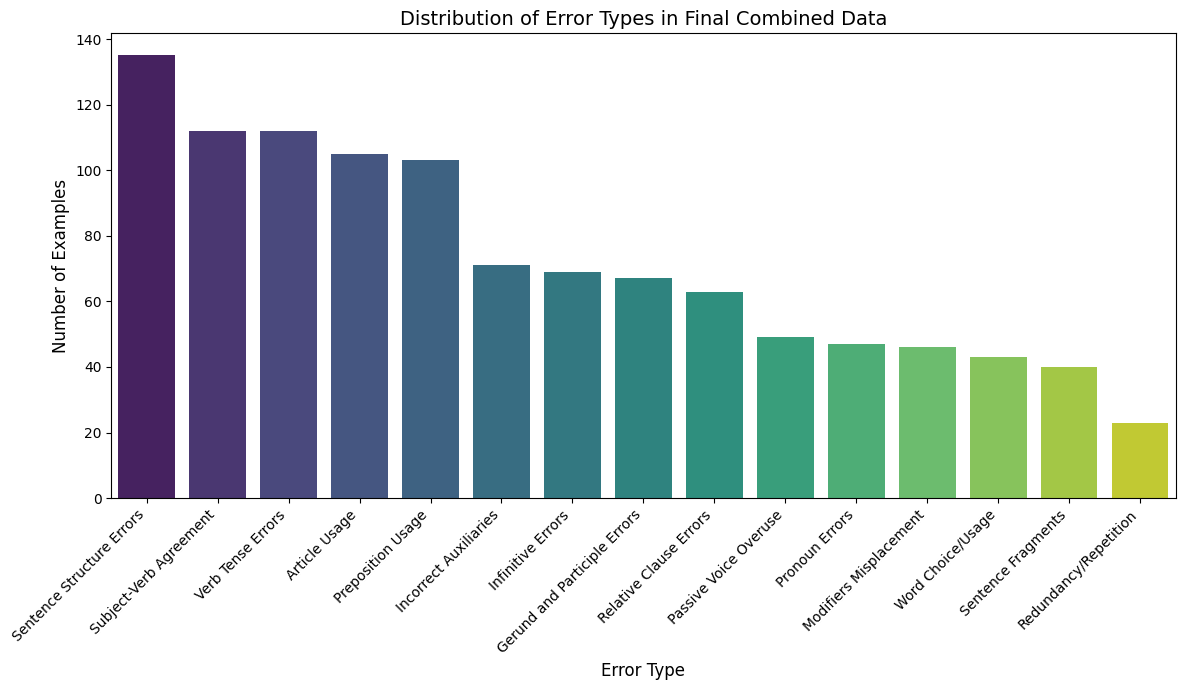

In [ ]:
# Hitung kemunculan setiap tipe error pada DataFrame final
final_error_counts = df_final['error_type'].value_counts()

# Tampilkan distribusi error type
print("\nDistribusi Kelas Error Type pada Data Final:")
print(final_error_counts)

# Visualisasi distribusi kelas error type
plt.figure(figsize=(12, 7))
sns.barplot(x=final_error_counts.index, y=final_error_counts.values, palette='viridis')
plt.xlabel("Error Type", fontsize=12)
plt.ylabel("Number of Examples", fontsize=12)
plt.title("Distribution of Error Types in Final Combined Data", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Putar label sumbu x agar mudah dibaca
plt.tight_layout()  # Sesuaikan tata letak agar tidak ada tumpang tindih
plt.show()

# Opsional: Visualisasikan top N error type jika terlalu banyak kelas
# Misalnya top 10
# top_n = 10
# final_error_counts_top_n = final_error_counts.head(top_n)
# plt.figure(figsize=(10, 6))
# sns.barplot(x=final_error_counts_top_n.index, y=final_error_counts_top_n.values, palette='viridis')
# plt.xlabel("Error Type")
# plt.ylabel("Number of Examples")
# plt.title(f"Top {top_n} Most Frequent Error Types in Final Combined Data")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline # Often useful to chain steps


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Lakukan hybrid sampling dan visualisasi


Class distribution before Hybrid Sampling (on TF-IDF data):
error_type_encoded
Article Usage                   105
Gerund and Participle Errors     67
Incorrect Auxiliaries            71
Infinitive Errors                69
Modifiers Misplacement           46
Passive Voice Overuse            49
Preposition Usage               103
Pronoun Errors                   47
Redundancy/Repetition            23
Relative Clause Errors           63
Sentence Fragments               40
Sentence Structure Errors       135
Subject-Verb Agreement          112
Verb Tense Errors               112
Word Choice/Usage                43
Name: count, dtype: int64

Target size for balancing: 67

RandomUnderSampler strategy:
{'Article Usage': 80, 'Preposition Usage': 80, 'Sentence Structure Errors': 80, 'Subject-Verb Agreement': 80, 'Verb Tense Errors': 80}

RandomOverSampler strategy:
{'Modifiers Misplacement': 67, 'Redundancy/Repetition': 67, 'Sentence Fragments': 67, 'Word Choice/Usage': 67}

Applying Hybrid S

<ipython-input-120-375f760c0ea0>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_error_counts_decoded.index, y=balanced_error_counts_decoded.values, palette='viridis')


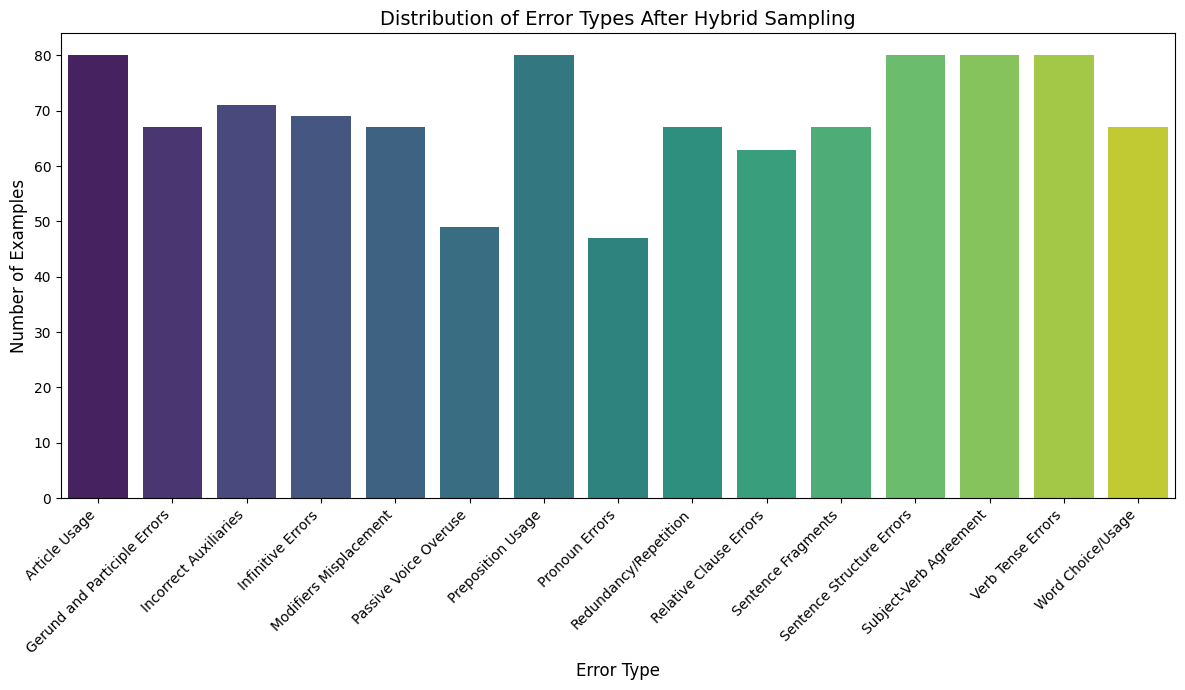

In [ ]:
# Check class distribution before hybrid sampling on X_vec and y
class_counts_before_hybrid = pd.Series(y).value_counts().sort_index()
class_counts_before_hybrid_decoded = class_counts_before_hybrid.rename(index=lambda x: le.inverse_transform([x])[0])

print("\nClass distribution before Hybrid Sampling (on TF-IDF data):")
print(class_counts_before_hybrid_decoded)

# Define desired target size (e.g., median count, or a fixed number)
# Using median from the counts before hybrid sampling on the full vectorized data (y)
target_size = int(class_counts_before_hybrid.median())
print(f"\nTarget size for balancing: {target_size}")

# Define sampling strategies
# RandomUnderSampler strategy: reduce majority classes
# Reduce classes with count significantly above target_size
rus_strategy = {}
for class_label, count in class_counts_before_hybrid.items():
    # Use the encoded integer label from value_counts
    if count > target_size * 1.5: # Adjust multiplier as needed
        rus_strategy[class_label] = int(target_size * 1.2) # Reduce to slightly above target

# RandomOverSampler strategy: boost minority classes
# Boost classes with count significantly below target_size
ros_strategy = {}
for class_label, count in class_counts_before_hybrid.items():
    # Use the encoded integer label from value_counts
    if count < target_size * 0.7: # Adjust multiplier as needed
        ros_strategy[class_label] = int(target_size) # Boost up to target size

print("\nRandomUnderSampler strategy:")
# Decode labels for printing
print({le.inverse_transform([label])[0]: count for label, count in rus_strategy.items()})

print("\nRandomOverSampler strategy:")
# Decode labels for printing
print({le.inverse_transform([label])[0]: count for label, count in ros_strategy.items()})


# Create the hybrid sampling pipeline
sampling_steps = []
if rus_strategy:
    sampling_steps.append(('under', RandomUnderSampler(sampling_strategy=rus_strategy, random_state=42)))
if ros_strategy:
    sampling_steps.append(('over', RandomOverSampler(sampling_strategy=ros_strategy, random_state=42)))

# Check if any sampling strategy was defined
if not sampling_steps:
    print("No classes meet the criteria for resampling based on the defined strategies and target size.")
    print("Skipping hybrid sampling. Using original vectorized data.")
    X_hybrid, y_hybrid = X_vec, y
else:
    hybrid_pipeline = Pipeline(sampling_steps)

    print("\nApplying Hybrid Sampling (Pipeline)...")
    try:
        X_hybrid, y_hybrid = hybrid_pipeline.fit_resample(X_vec, y)
        print("✅ Hybrid Sampling applied successfully.")
    except Exception as e:
        print(f"Error applying hybrid sampling: {e}")
        print("Skipping hybrid sampling. Using original vectorized data.")
        X_hybrid, y_hybrid = X_vec, y


# Check class distribution after hybrid sampling
balanced_error_counts_encoded = pd.Series(y_hybrid).value_counts().sort_index()
balanced_error_counts_decoded = balanced_error_counts_encoded.rename(index=lambda x: le.inverse_transform([x])[0])

print("\n✅ Decoded class distribution after hybrid sampling:")
print(balanced_error_counts_decoded)
print(f"Total samples after hybrid sampling: {len(y_hybrid)}")


# Visualization of the balanced distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=balanced_error_counts_decoded.index, y=balanced_error_counts_decoded.values, palette='viridis')
plt.xlabel("Error Type", fontsize=12)
plt.ylabel("Number of Examples", fontsize=12)
plt.title("Distribution of Error Types After Hybrid Sampling", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Now, X_hybrid and y_hybrid contain your balanced dataset (in vectorized form).
# You can proceed to train your model (e.g., XGBoost) using X_hybrid and y_hybrid.
# The previous training step using model_xgb_balanced is already done after this cell in the original code block.

# If you need to save this balanced dataset in a text format (input, target, error_type),
# please refer to the section in the original code that creates `df_balanced_text_format`
# and saves/downloads it. Be mindful that reconstructing text input/target exactly
# for oversampled data is challenging from the vectorized format.


In [ ]:

if 'y_hybrid' in locals():
    print(f"Jumlah total data setelah penyeimbangan hybrid sampling: {len(y_hybrid)}")
else:
    print("Variabel 'y_hybrid' tidak ditemukan. Penyeimbangan hybrid sampling mungkin belum dijalankan.")

if 'balanced_error_counts_decoded' in locals():
    print("\nDetail distribusi kelas setelah penyeimbangan hybrid sampling:")
balanced_error_counts_decoded


Jumlah total data setelah penyeimbangan hybrid sampling: 1034

Detail distribusi kelas setelah penyeimbangan hybrid sampling:


,count
error_type_encoded,
Article Usage,80
Gerund and Participle Errors,67
Incorrect Auxiliaries,71
Infinitive Errors,69
Modifiers Misplacement,67
Passive Voice Overuse,49
Preposition Usage,80
Pronoun Errors,47
Redundancy/Repetition,67


## Cek panjang kata untuk mengetahui model nantinya akan berfokus pada kisaran berapa kata


Distribusi Panjang Kata pada Kolom 'Ungrammatical Statement':
input_length
3       4
4      32
5      88
6     173
7     262
8     339
9     377
10    293
11    174
12     97
13     66
14     51
15     25
16     19
17     10
18      4
19      1
20      1
21      1
22      1
Name: count, dtype: int64

Statistik Panjang Kata pada Kolom 'Ungrammatical Statement':
count    2018.000000
mean        8.989098
std         2.520886
min         3.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        22.000000
Name: input_length, dtype: float64


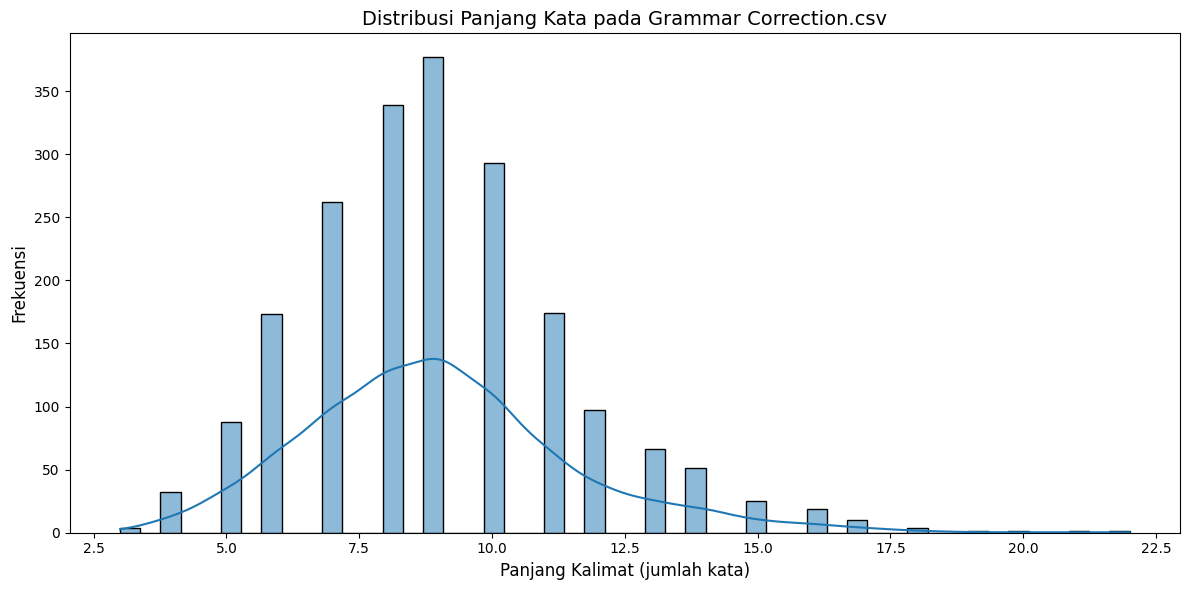

In [ ]:
# Fungsi untuk menghitung panjang kata dalam string
def count_word_length(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0
    # Split the string by whitespace and count the resulting list's length
    return len(text.split())

# Add 'input_length' column to df2 (the original Grammar Correction data)
# Assuming 'Ungrammatical Statement' is the input column in df2
if 'df2' in locals() and isinstance(df2, pd.DataFrame) and not df2.empty:
    if 'Ungrammatical Statement' in df2.columns:
        df2['input_length'] = df2['Ungrammatical Statement'].apply(count_word_length)

        # Calculate and print the distribution of input word lengths
        print("\nDistribusi Panjang Kata pada Kolom 'Ungrammatical Statement':")
        print(df2['input_length'].value_counts().sort_index())

        # Optional: Print descriptive statistics
        print("\nStatistik Panjang Kata pada Kolom 'Ungrammatical Statement':")
        print(df2['input_length'].describe())

        # Optional: Visualize the distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(df2['input_length'], bins=50, kde=True)
        plt.xlabel("Panjang Kalimat (jumlah kata)", fontsize=12)
        plt.ylabel("Frekuensi", fontsize=12)
        plt.title("Distribusi Panjang Kata pada Grammar Correction.csv", fontsize=14)
        plt.tight_layout()
        plt.show()

    else:
        print("Kolom 'Ungrammatical Statement' tidak ditemukan di df2.")
else:
    print("DataFrame 'df2' tidak ditemukan atau kosong. Mohon muat data terlebih dahulu.")
